# Micro Credit Defaulter

## 1.Data analysis

### (i) Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### (2) Data loading and cleaning

In [2]:
df=pd.read_csv(r"C:\Users\Hi\Downloads\Micro-Credit-Project--1-\Micro Credit Project\Data file.csv")

In [3]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [4]:
df.shape

(209593, 37)

In [5]:
# removing unnecessary column
df = df.drop(['Unnamed: 0'],axis = 1)
df.head(10)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,1539,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,5787,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
7,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,3178,...,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
8,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,1539,...,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,773,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


In [6]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

### About Features

label: Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
    
msisdn : mobile number of user
    
aon : age on cellular network in days
    
daily_decr30 : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
    
daily_decr90 : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
    
rental30 : Average main account balance over last 30 days
    
rental90 : Average main account balance over last 90 days
    
last_rech_date_ma : Number of days till last recharge of main account
    
last_rech_date_da: Number of days till last recharge of data account
    
last_rech_amt_ma : Amount of last recharge of main account (in Indonesian Rupiah)
    
cnt_ma_rech30 : Number of times main account got recharged in last 30 days
    
fr_ma_rech30 : Frequency of main account recharged in last 30 days
    
sumamnt_ma_rech30 : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
    
medianamnt_ma_rech30 : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
    
medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
    
cnt_ma_rech90 : Number of times main account got recharged in last 90 days
    
fr_ma_rech90 : Frequency of main account recharged in last 90 days
    
sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
    
medianamnt_ma_rech90 : Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
    
medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
    
cnt_da_rech30 : Number of times data account got recharged in last 30 days

fr_da_rech30: Frequency of data account recharged in last 30 days
        
cnt_da_rech90 : Number of times data account got recharged in last 90 days
    
fr_da_rech90 : Frequency of data account recharged in last 90 days
    
cnt_loans30 : Number of loans taken by user in last 30 days
    
amnt_loans30 : Total amount of loans taken by user in last 30 days
    
maxamnt_loans30 : maximum amount of loan taken by the user in last 30 days
    
medianamnt_loans30 : Median of amounts of loan taken by the user in last 30 days
    
cnt_loans90 : Number of loans taken by user in last 90 days
    
amnt_loans90 : Total amount of loans taken by user in last 90 days
    
maxamnt_loans90 : maximum amount of loan taken by the user in last 90 days
    
medianamnt_loans90 : Median of amounts of loan taken by the user in last 90 days
    
payback30 : Average payback time in days over last 30 days
    
payback90 : Average payback time in days over last 90 days
    
pcircle : telecom circle
    
pdate : date

In [7]:
# Check Null Values

df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

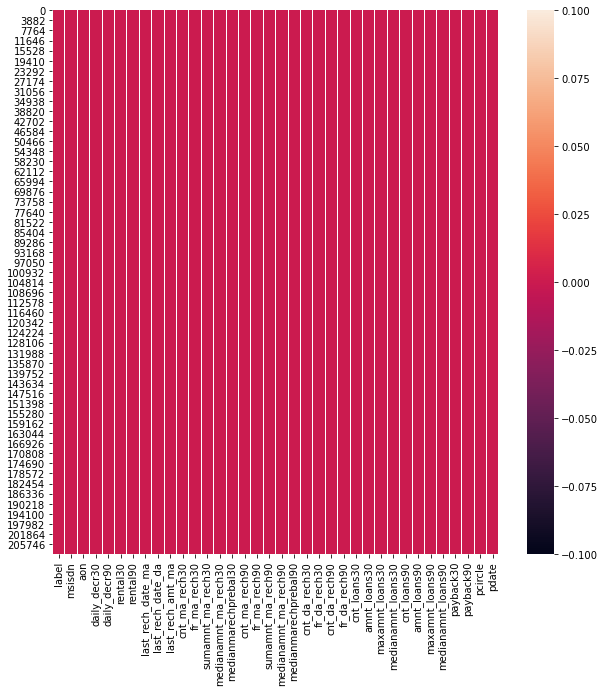

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull());

#### Describing Datasets

In [9]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [11]:
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [12]:
# Converting Date datatypes and spliting date into date, month and year.
df['pdate']=pd.to_datetime(df['pdate'])
df['Day']=df['pdate'].apply(lambda x:x.day)
df['Month']=df['pdate'].apply(lambda x:x.month)
df['Year']=df['pdate'].apply(lambda x:x.year)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,Day,Month,Year
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6,0.0,29.000000,29.000000,UPW,2016-07-20,20,7,2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12,0.0,0.000000,0.000000,UPW,2016-08-10,10,8,2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6,0.0,0.000000,0.000000,UPW,2016-08-19,19,8,2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6,0.0,0.000000,0.000000,UPW,2016-06-06,6,6,2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6,0.0,2.333333,2.333333,UPW,2016-06-22,22,6,2016


In [13]:
#Droping pdate column after extraction
df.drop(['pdate'],axis=1,inplace=True)

In [14]:
df.drop(['Year'],axis=1,inplace=True)

In [15]:
#Converting all negative values to positive values in above columns
df['aon']=abs(df['aon'])
df['daily_decr30']=abs(df['daily_decr30'])
df['daily_decr90']=abs(df['daily_decr90'])
df['rental30']=abs(df['rental30'])
df['rental90']=abs(df['rental90'])
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['last_rech_date_da']=abs(df['last_rech_date_da'])

##### We have successfully converted negative data into positive data.

### Removing irrelavent columns

In [16]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

#### Since pcircle attribute has only one value 'UPW' for all rows we are removing that attribute from table

In [17]:
df = df.drop(['pcircle'],axis=1)

##### since mobile munber is not going to play a vital role in determination of loan pay back so removing 'msisdn'

In [18]:
df = df.drop(['msisdn'],axis=1)

#### We are making assumption here that loan amount greater than 12 to be replace with zero.

In [19]:
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0)
       & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']=0.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

# 2.EDA

#### Univariant analysis

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

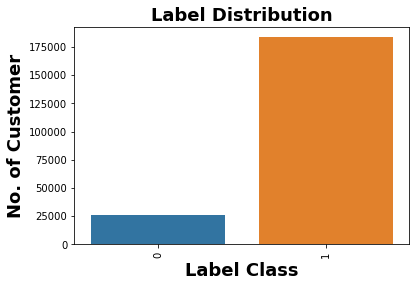

In [21]:
sns.countplot(x='label',data=df)
plt.title('Label Distribution',fontsize=18,fontweight ='bold')
plt.xlabel("Label Class",fontsize=18,fontweight ='bold')
plt.ylabel("No. of Customer",fontsize=18,fontweight ='bold')
plt.xticks(rotation=90)


<AxesSubplot:xlabel='Month', ylabel='count'>

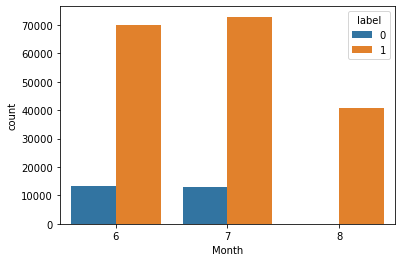

In [22]:
sns.countplot('Month',hue='label',data=df)

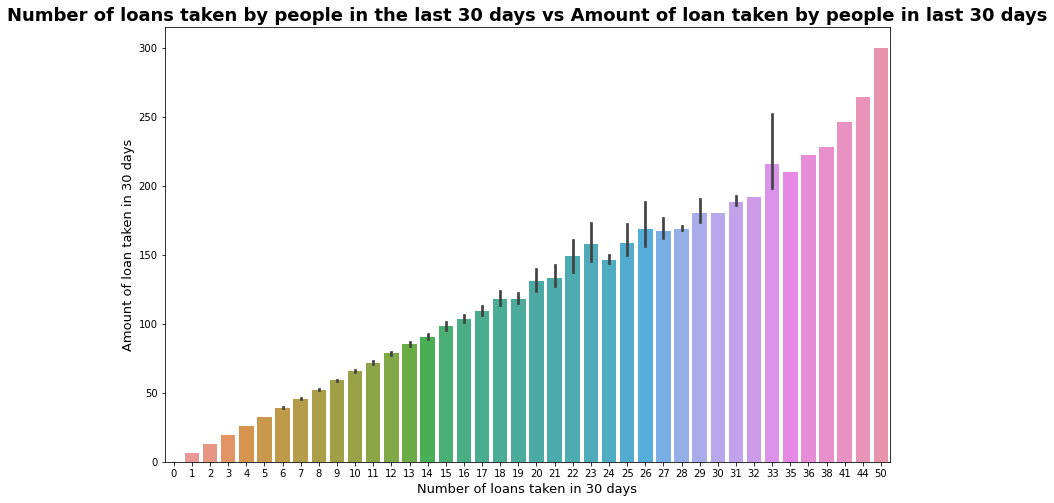

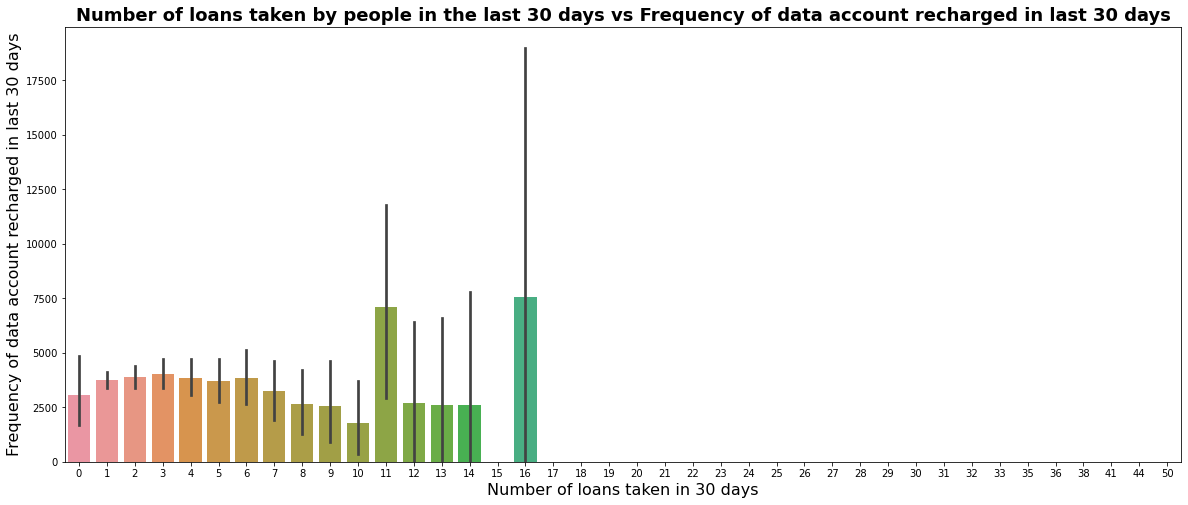

In [23]:
#Checking the number of loans taken by people in last 30 days vs Amount of loan taken by the people in last 90 days.
plt.figure(figsize=(13,8))
sns.barplot(x="cnt_loans30",y='amnt_loans30', data=df)
plt.title('Number of loans taken by people in the last 30 days vs Amount of loan taken by people in last 30 days',fontsize=18,fontweight ='bold')
plt.xlabel('Number of loans taken in 30 days',fontsize=13)
plt.ylabel('Amount of loan taken in 30 days',fontsize=13)
plt.show()
#Checking the number of loans taken by people in last 30 days vsFrequency of data account recharged in last 30 days.
plt.figure(figsize=(20,8))
sns.barplot(x="cnt_loans30",y='fr_da_rech30', data=df)
plt.title('Number of loans taken by people in the last 30 days vs Frequency of data account recharged in last 30 days',fontsize=18,fontweight ='bold')
plt.xlabel('Number of loans taken in 30 days',fontsize=16)
plt.ylabel('Frequency of data account recharged in last 30 days',fontsize=16)
plt.show()

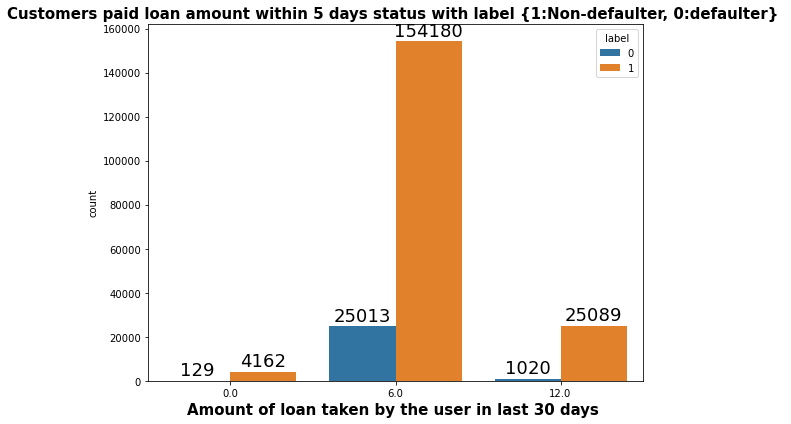

In [24]:
plt.figure(figsize=(8,6))
pd =sns.countplot(x = "maxamnt_loans30" ,  data=df  , hue= 'label')
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size=18, xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("Amount of loan taken by the user in last 30 days ",fontsize=15,fontweight ='bold')

plt.title ("Customers paid loan amount within 5 days status with label {1:Non-defaulter, 0:defaulter} "
           ,fontsize=15,fontweight ='bold')
plt.tight_layout()
plt.show()

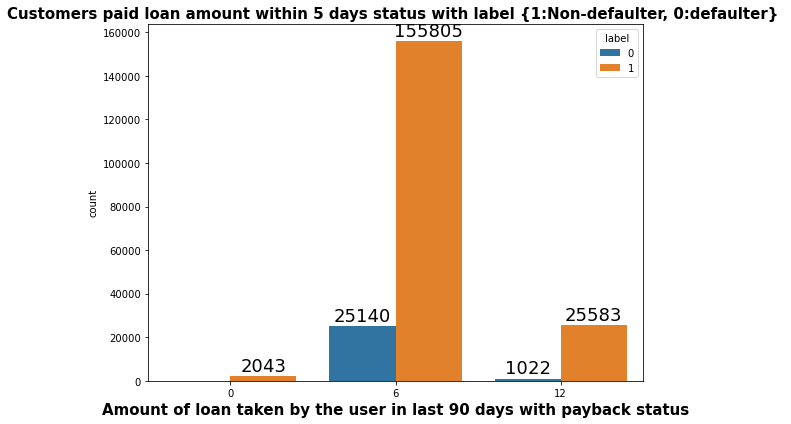

In [25]:
plt.figure(figsize=(8,6))
pd =sns.countplot(x = "maxamnt_loans90" ,  data=df  , hue= 'label')
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size=18, xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("Amount of loan taken by the user in last 90 days with payback status",fontsize=15,fontweight ='bold')

plt.title ("Customers paid loan amount within 5 days status with label {1:Non-defaulter, 0:defaulter} "
           ,fontsize=15,fontweight ='bold')
plt.tight_layout()
plt.show()

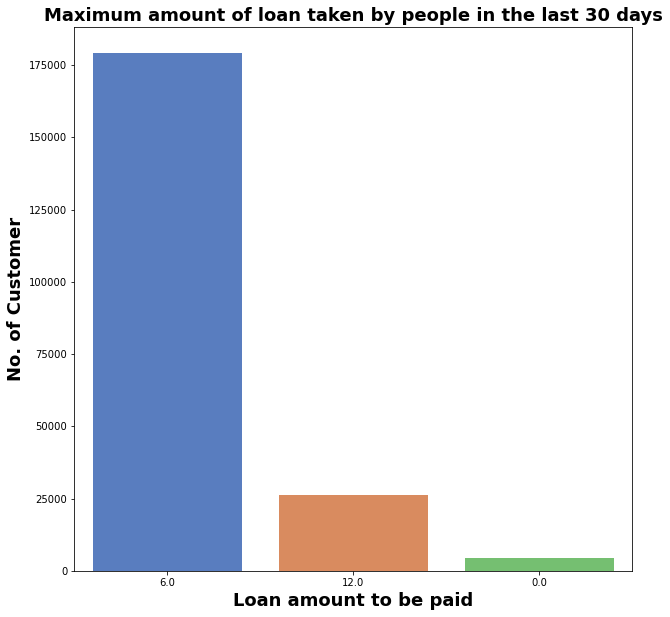

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64


In [26]:
plt.figure(figsize = (10,10))
sns.countplot(x='maxamnt_loans30',data=df,palette='muted',order=df['maxamnt_loans30'].value_counts().index)
plt.title('Maximum amount of loan taken by people in the last 30 days',fontsize=18,fontweight ='bold')
plt.xlabel('Loan amount to be paid',fontsize=18,fontweight ='bold')
plt.ylabel('No. of Customer',fontsize=18,fontweight ='bold')
plt.show()
print(df['maxamnt_loans30'].value_counts())

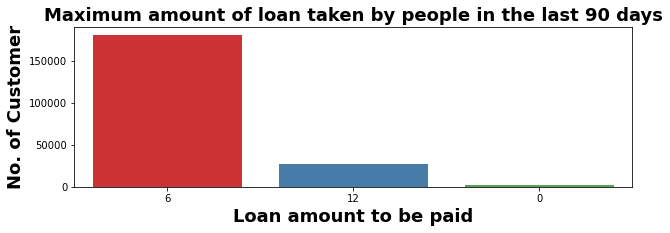

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64


In [27]:
plt.figure(figsize = (10,10))
plt.subplot(312)
sns.countplot(x='maxamnt_loans90',data=df,palette='Set1',order=df['maxamnt_loans90'].value_counts().index)
plt.title('Maximum amount of loan taken by people in the last 90 days',fontsize=18,fontweight ='bold')
plt.xlabel('Loan amount to be paid',fontsize=18,fontweight ='bold')
plt.ylabel('No. of Customer',fontsize=18,fontweight ='bold')
plt.show()
print(df['maxamnt_loans90'].value_counts())

#### INFERENCE:

*In 30 days, maximum number of people had taken 6Rs as the loan amount and the number of people is 179192 whereas the number of people had not taken loan and their number is 4291.

*In 90 days, maximum number of people had taken 6Rs as the loan amount and the number of people is 180944 whereas the number of people had not taken loan and their number is 2043.

*Maximum number of people had taken 12Rs as the loan amount within 90 days and their number is 26109 whereas for 30 days the number of people who had taken 12Rs is 26605 respectively.

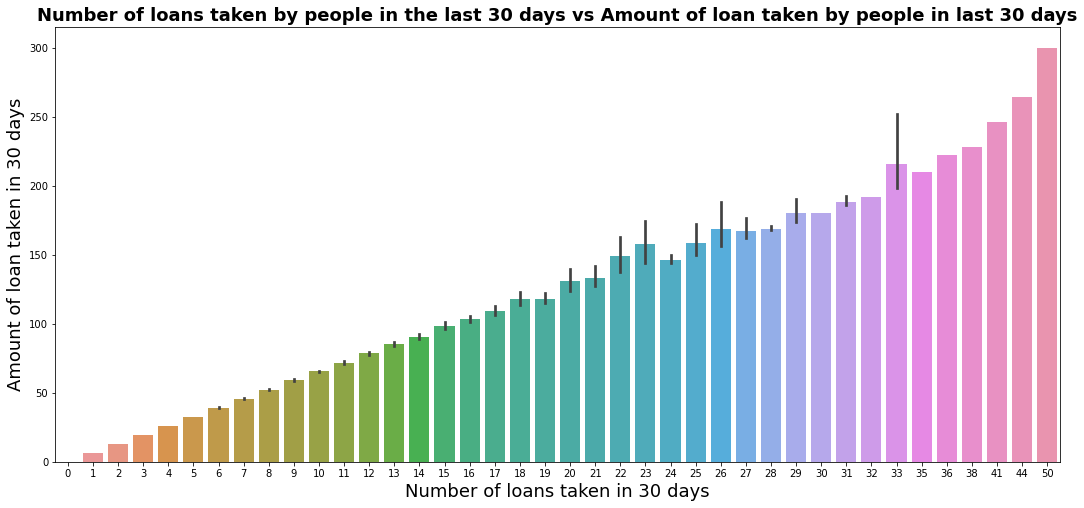

In [28]:
#Checking the number of loans taken by people in last 30 days vs Amount of loan taken by the people in last 90 days.
plt.figure(figsize=(18,8))
sns.barplot(x="cnt_loans30",y='amnt_loans30', data=df)
plt.title('Number of loans taken by people in the last 30 days vs Amount of loan taken by people in last 30 days',fontsize=18,fontweight ='bold')
plt.xlabel('Number of loans taken in 30 days',fontsize=18)
plt.ylabel('Amount of loan taken in 30 days',fontsize=18)
plt.show()

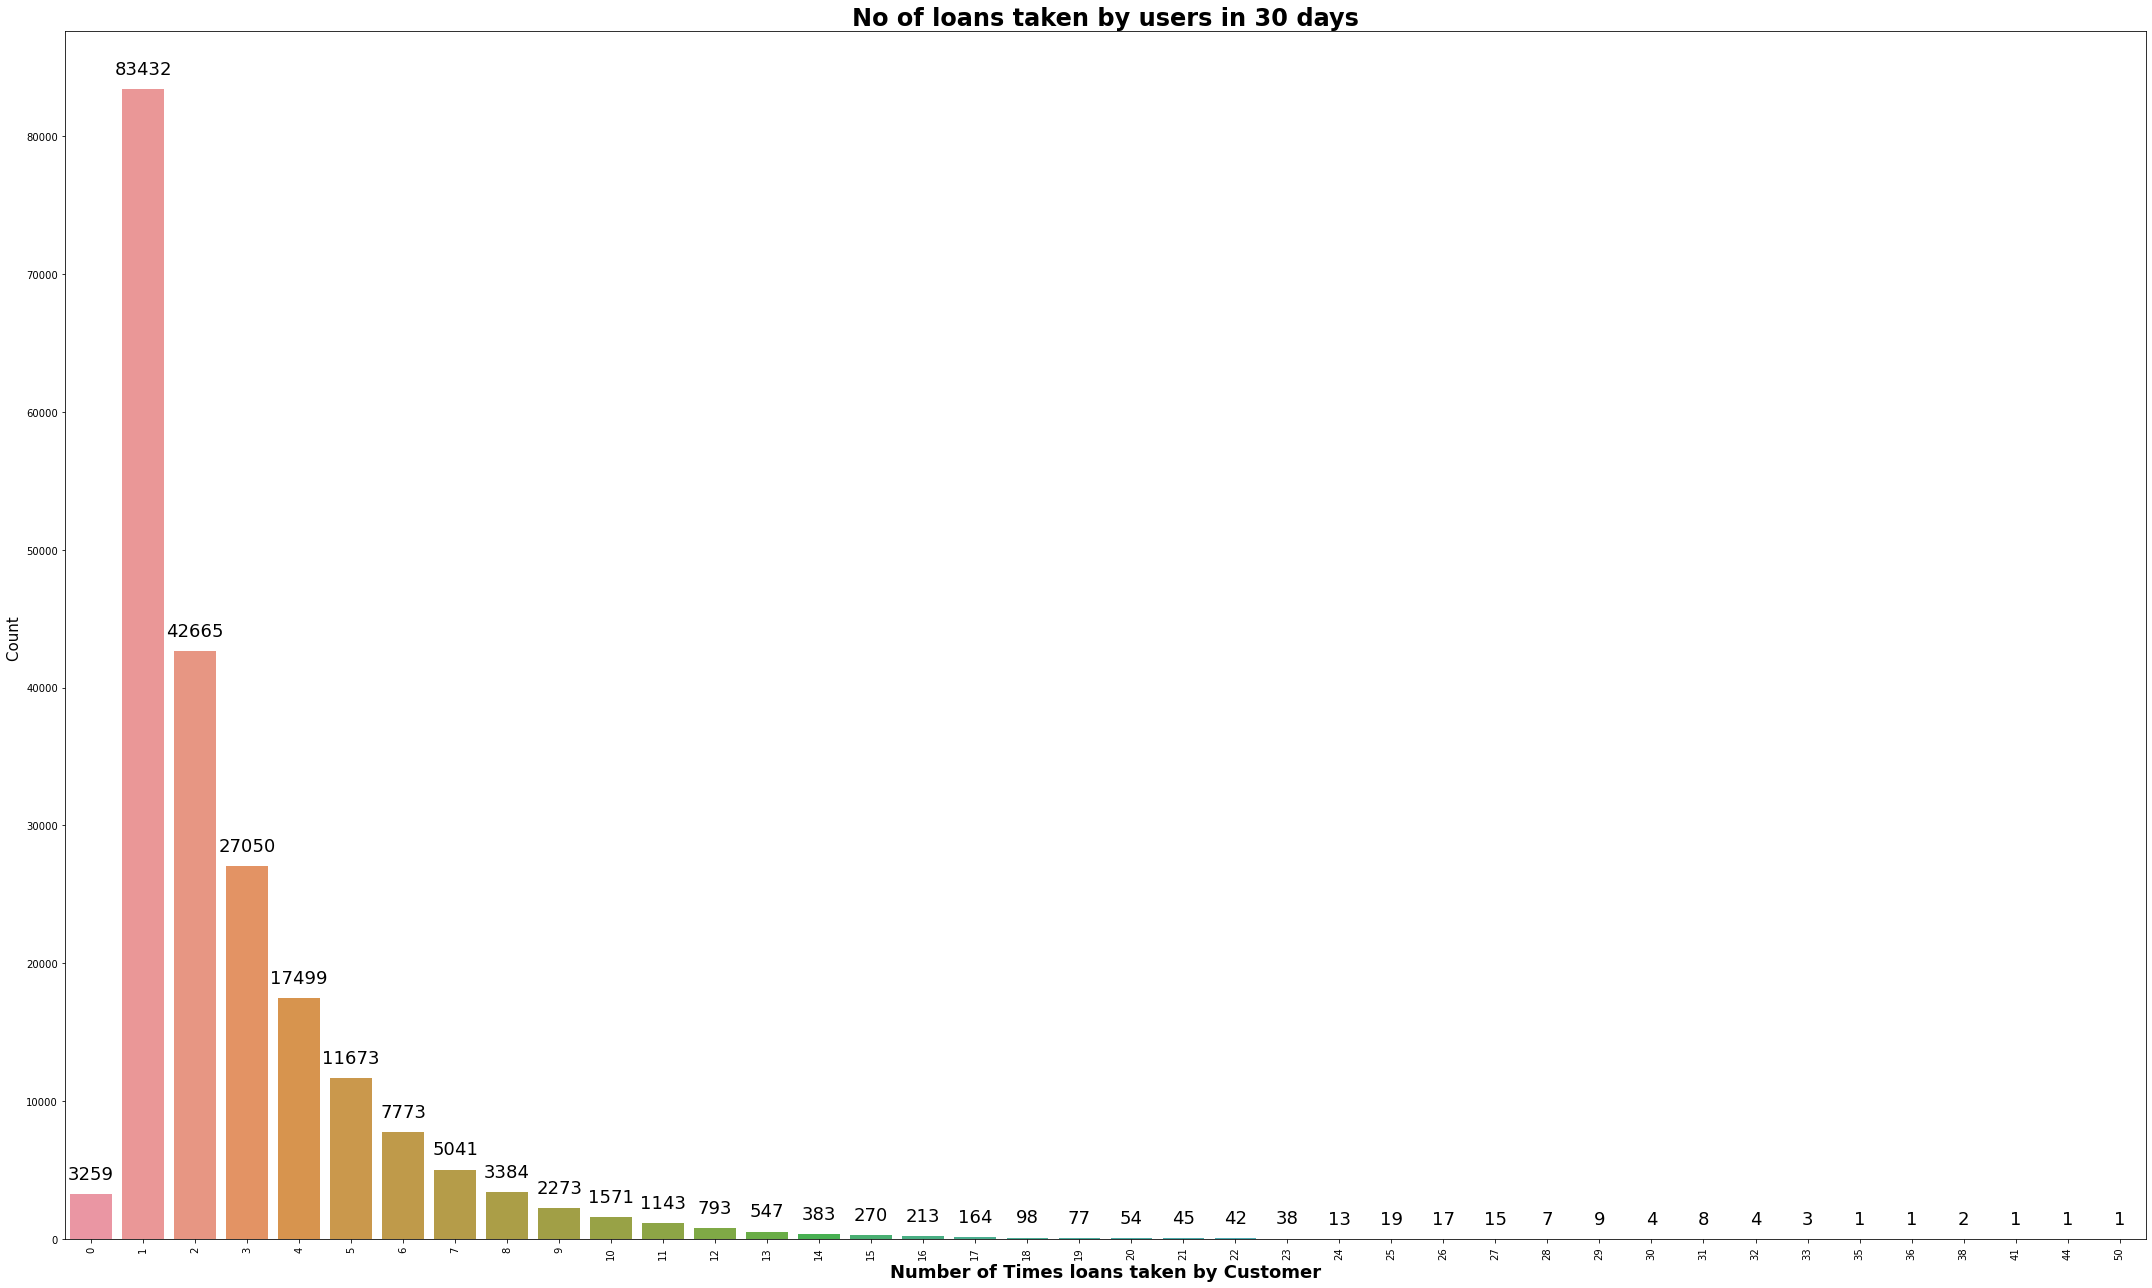

In [29]:
plt.figure(figsize=(30,18))
pd =sns.countplot(x = "cnt_loans30" ,  data=df)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size=18, xytext = (0, 20), textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("Number of Times loans taken by Customer",fontsize=18,fontweight ='bold')
plt.ylabel("Count " ,size=15)
plt.title ("No of loans taken by users in 30 days" ,fontsize=24,fontweight ='bold')
plt.tight_layout()
plt.show()

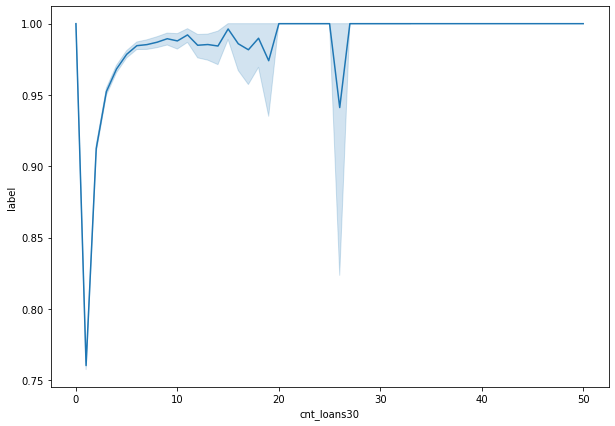

In [30]:
plt.figure(figsize=(10,7))
sns.lineplot(x='cnt_loans30', y='label', data=df)
plt.show()

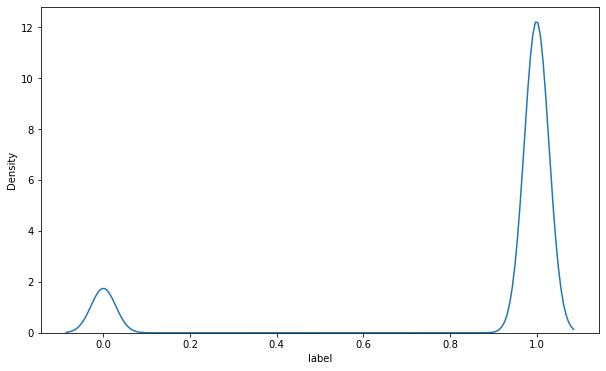

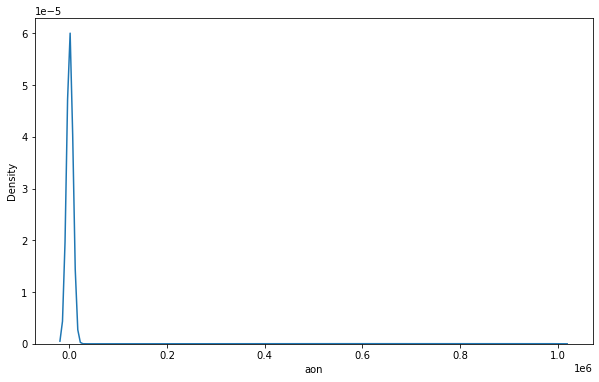

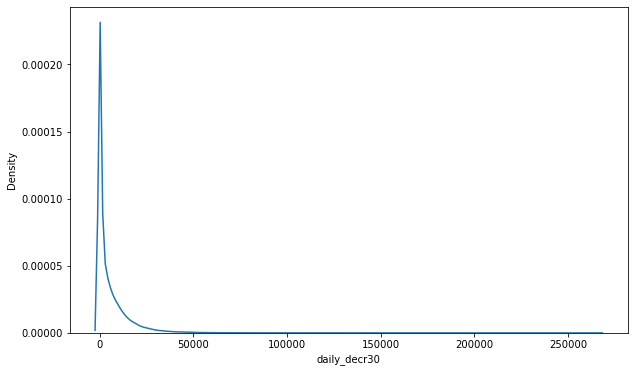

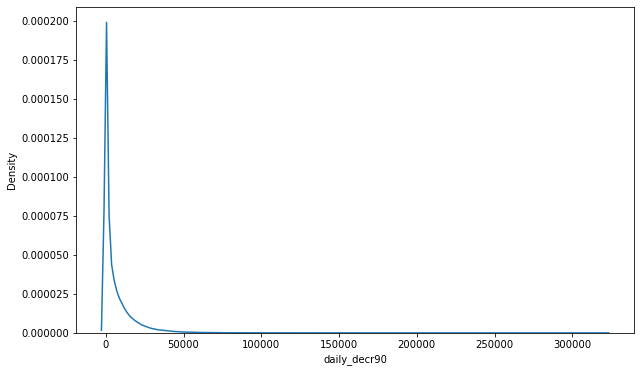

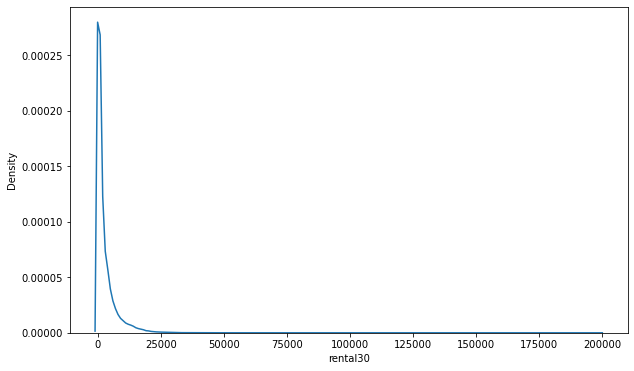

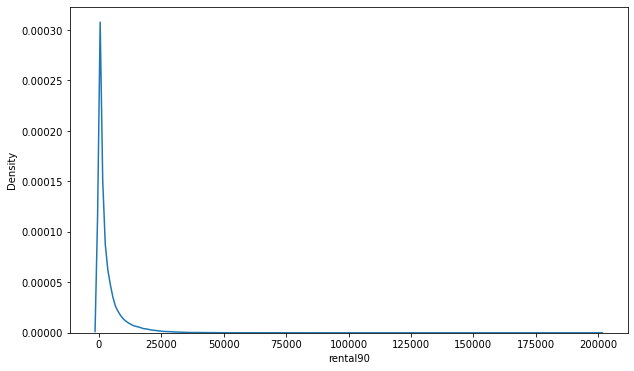

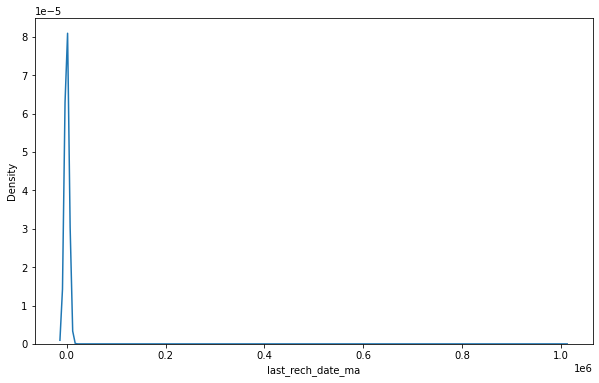

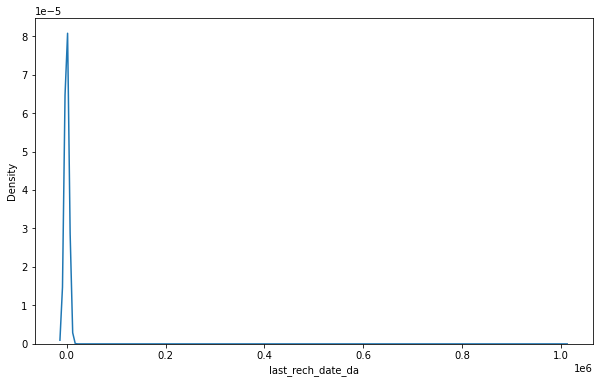

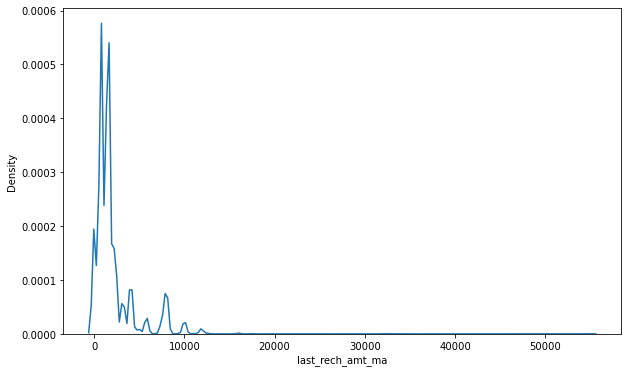

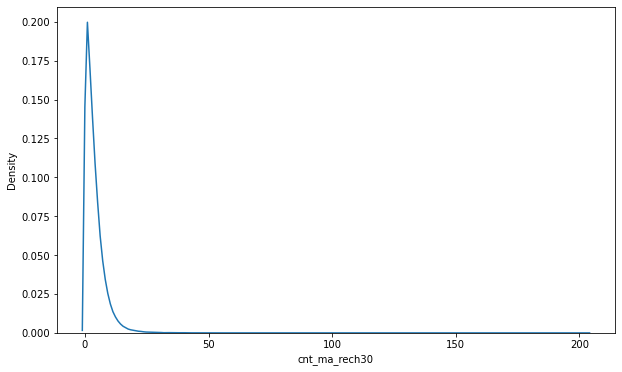

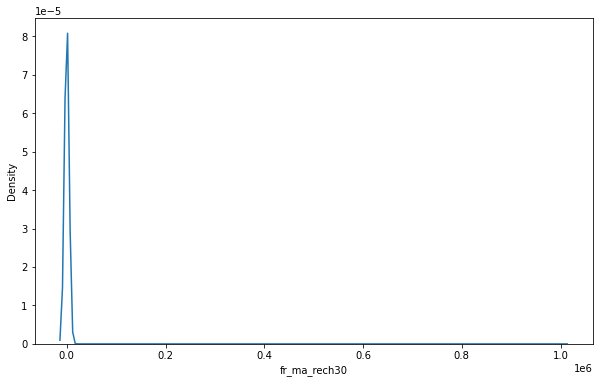

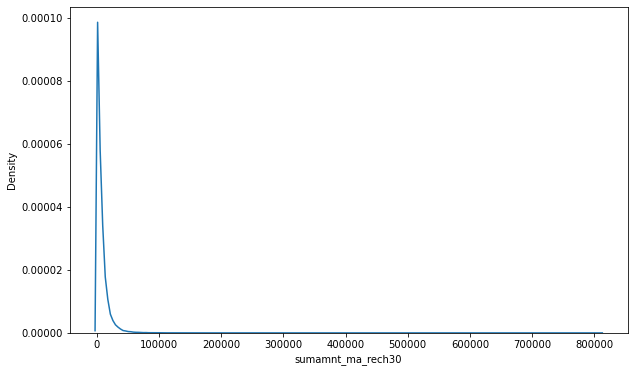

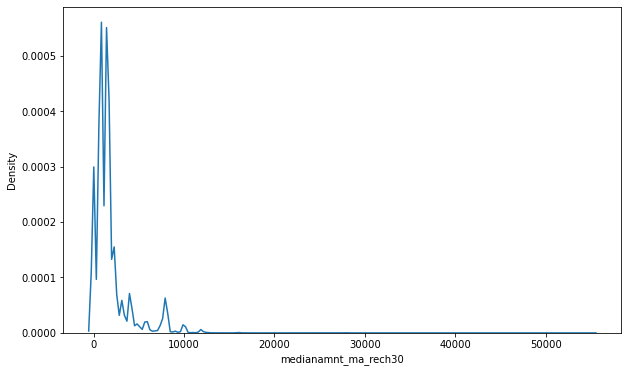

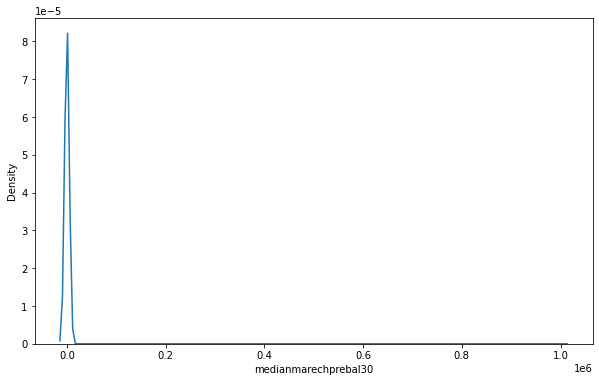

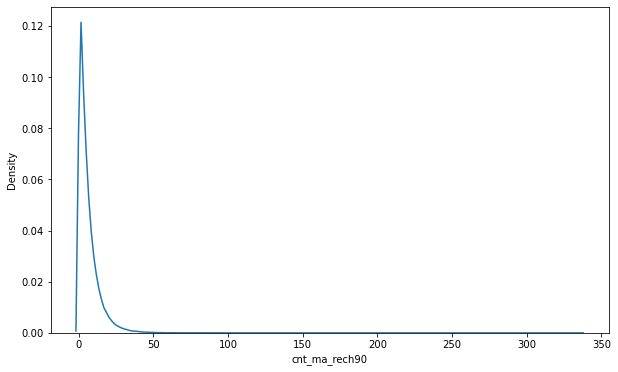

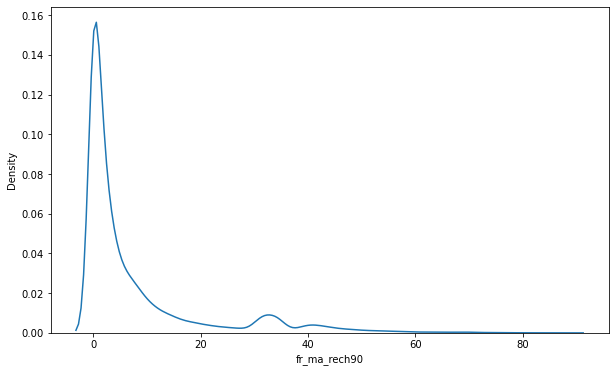

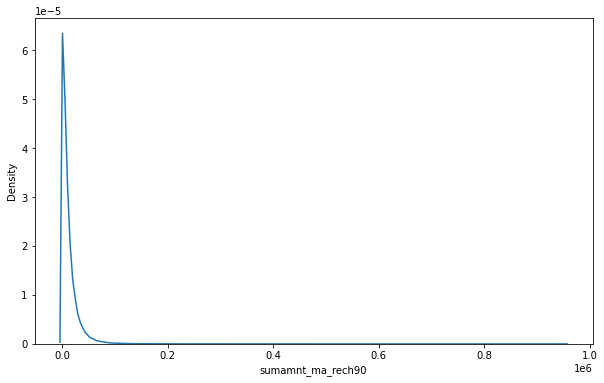

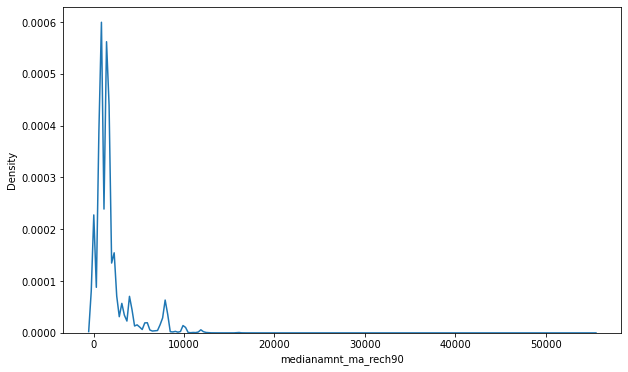

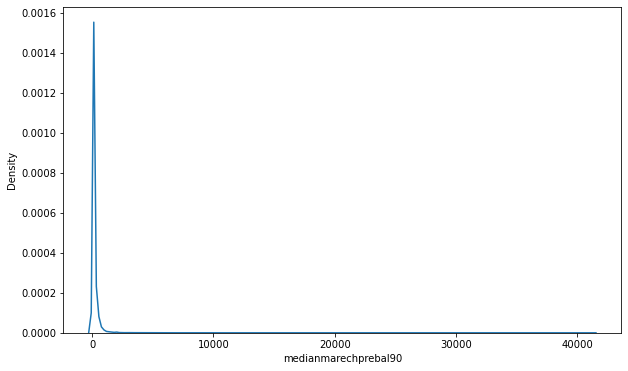

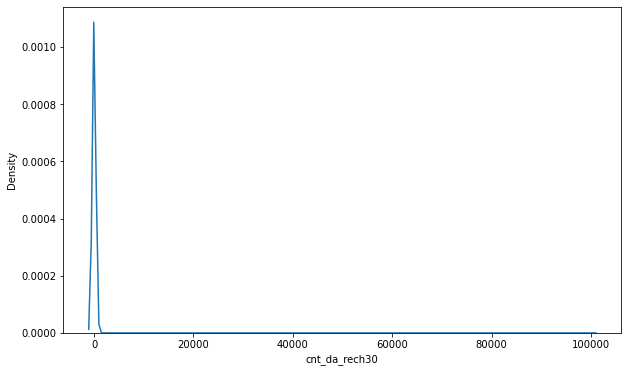

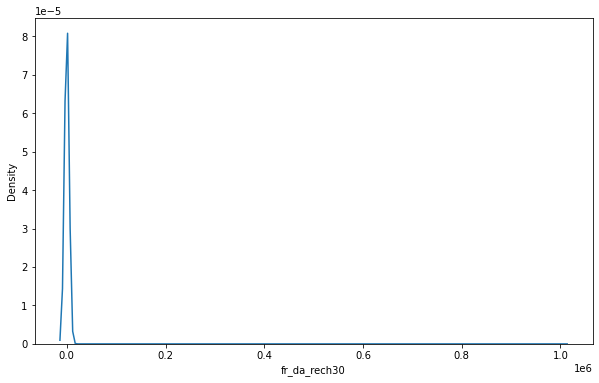

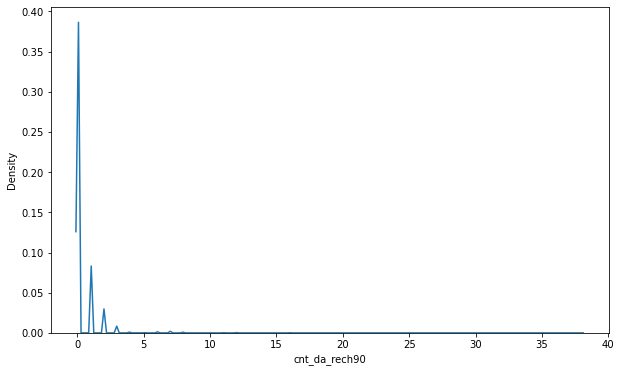

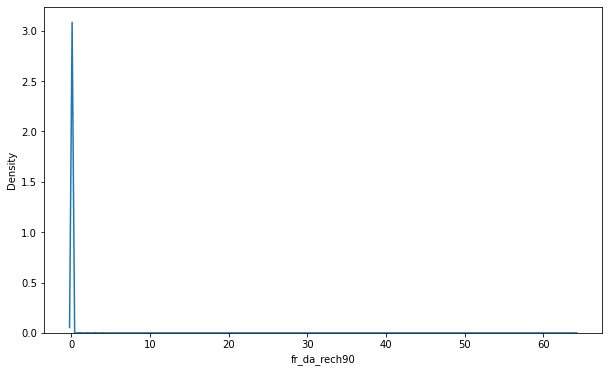

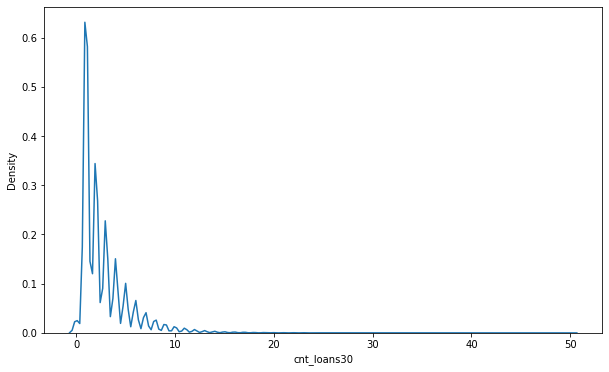

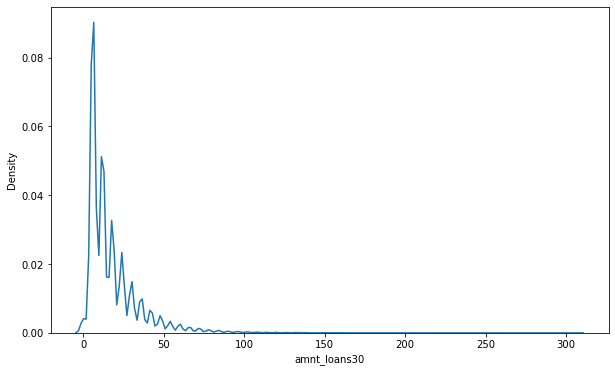

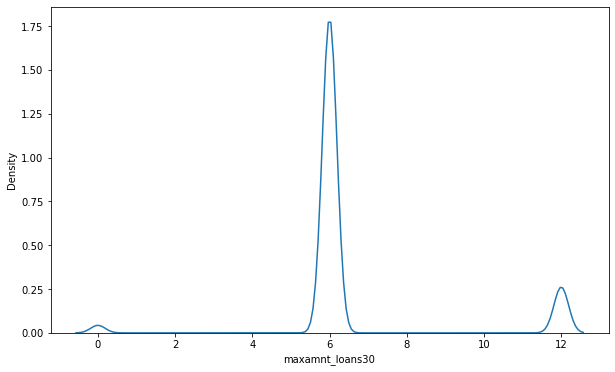

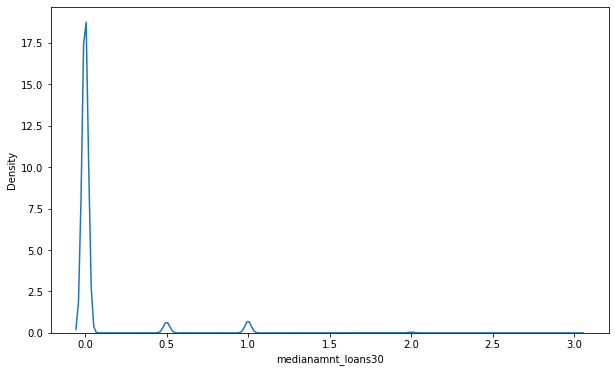

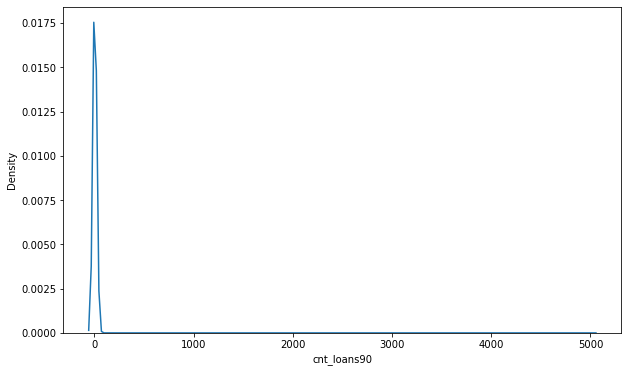

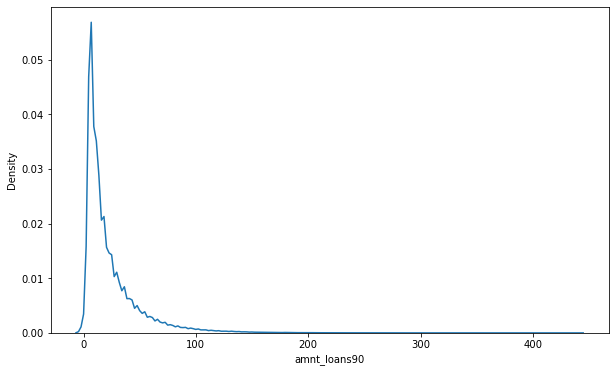

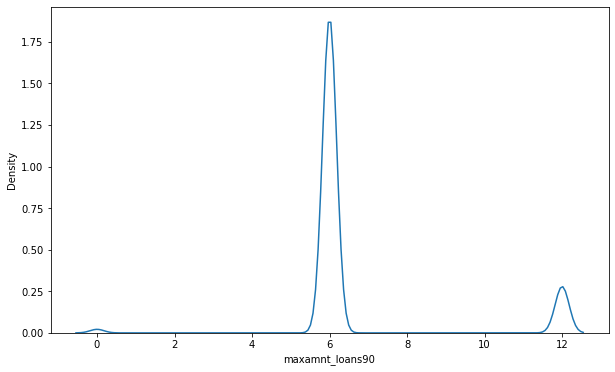

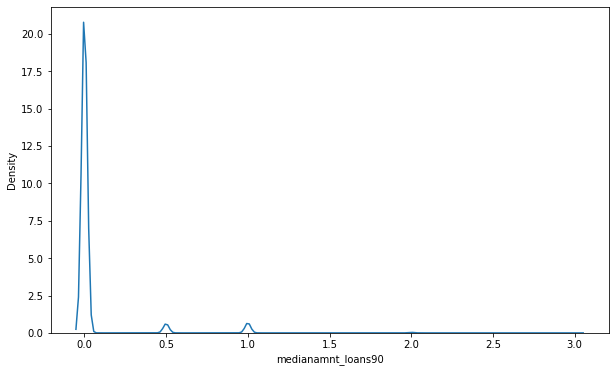

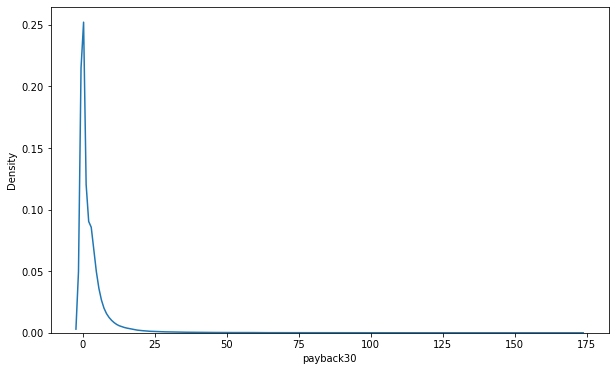

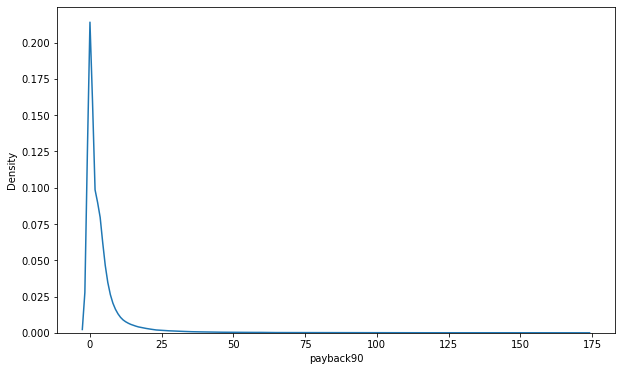

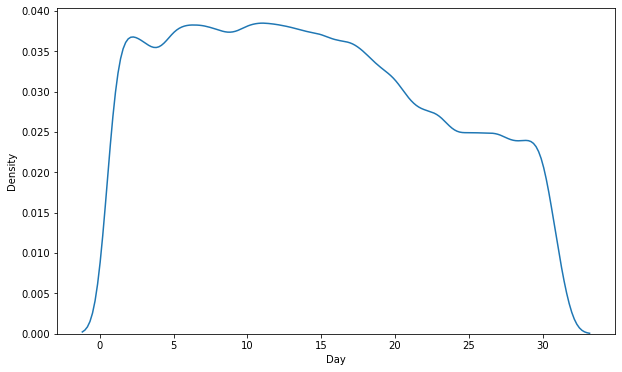

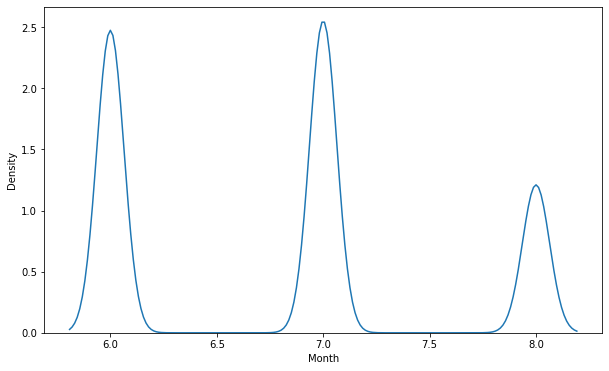

In [31]:
for i in df.columns:
  plt.figure(figsize=[10,6])
  sns.kdeplot(df[i])

# correlation

In [32]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
label,1.000000,-0.003788,0.168293,0.166146,0.058645,0.076033,0.003730,0.001711,0.131804,0.237331,...,0.072203,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.006825,0.154949
aon,-0.003788,1.000000,0.001101,0.000371,-0.000796,-0.000693,0.001692,-0.001693,0.004253,-0.003152,...,-0.000692,0.004665,-0.000611,-0.002323,-0.001193,0.002772,0.001938,0.002201,0.000659,-0.001869
daily_decr30,0.168293,0.001101,1.000000,0.977704,0.441532,0.459200,0.000484,-0.001636,0.275836,0.451383,...,0.371585,-0.011611,0.008962,0.563495,0.400199,-0.037305,0.026914,0.047174,0.006480,0.518661
daily_decr90,0.166146,0.000371,0.977704,1.000000,0.434106,0.471894,0.000905,-0.001886,0.264130,0.426706,...,0.365176,-0.005592,0.009446,0.567203,0.397251,-0.034686,0.019399,0.040799,-0.021505,0.539408
rental30,0.058645,-0.000796,0.441532,0.434106,1.000000,0.955014,-0.001177,0.003169,0.134436,0.235484,...,0.213064,-0.016536,0.004084,0.298886,0.234106,-0.035429,0.072888,0.094828,0.038310,0.362763
rental90,0.076033,-0.000693,0.459200,0.471894,0.955014,1.000000,-0.001781,0.002690,0.127888,0.231900,...,0.224166,-0.009516,0.005183,0.327480,0.251250,-0.034113,0.067003,0.099257,0.010126,0.427715
last_rech_date_ma,0.003730,0.001692,0.000484,0.000905,-0.001177,-0.001781,1.000000,0.001790,-0.000146,0.004308,...,-0.001354,0.001835,-0.000226,0.000867,-0.001124,0.002771,-0.002235,-0.001585,0.000557,-0.001213
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003169,0.002690,0.001790,1.000000,-0.000149,0.001549,...,0.002714,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,0.000631,-0.001800
last_rech_amt_ma,0.131804,0.004253,0.275836,0.264130,0.134436,0.127888,-0.000146,-0.000149,1.000000,-0.002662,...,0.134299,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.028883,0.096919
cnt_ma_rech30,0.237331,-0.003152,0.451383,0.426706,0.235484,0.231900,0.004308,0.001549,-0.002662,1.000000,...,0.169605,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362,0.068643,0.156148


<AxesSubplot:>

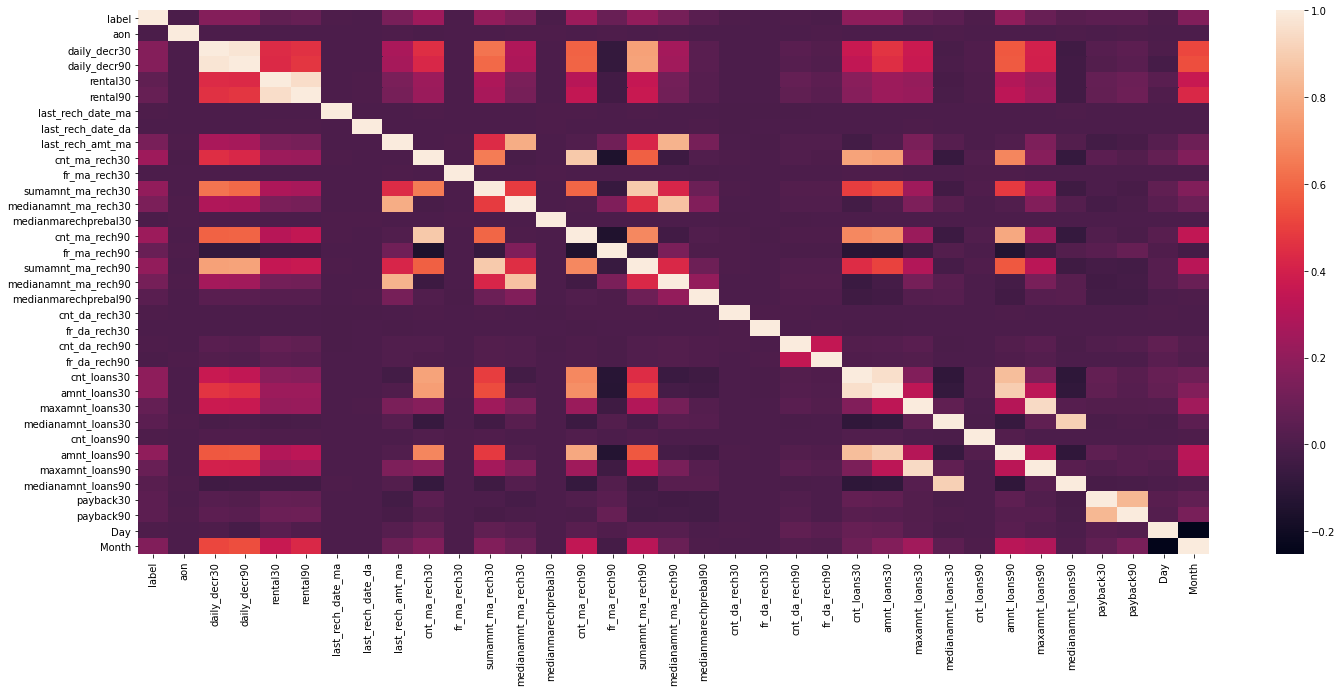

In [33]:
df_corr=df.corr()
plt.figure(figsize=[24,10])
sns.heatmap(df_corr)

In [34]:
#STRONGLY +VE CORRELATED WITH CLASS
POS_CORR= df_corr["label"] > 0.1
POS_CORR

label                    True
aon                     False
daily_decr30             True
daily_decr90             True
rental30                False
rental90                False
last_rech_date_ma       False
last_rech_date_da       False
last_rech_amt_ma         True
cnt_ma_rech30            True
fr_ma_rech30            False
sumamnt_ma_rech30        True
medianamnt_ma_rech30     True
medianmarechprebal30    False
cnt_ma_rech90            True
fr_ma_rech90            False
sumamnt_ma_rech90        True
medianamnt_ma_rech90     True
medianmarechprebal90    False
cnt_da_rech30           False
fr_da_rech30            False
cnt_da_rech90           False
fr_da_rech90            False
cnt_loans30              True
amnt_loans30             True
maxamnt_loans30         False
medianamnt_loans30      False
cnt_loans90             False
amnt_loans90             True
maxamnt_loans90         False
medianamnt_loans90      False
payback30               False
payback90               False
Day       

# 3. Data pre-processing

### 1)Null value removal

In [35]:
print(df.isnull().sum())

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
Day                     0
Month                   0
dtype: int64


There is no null values in dataset



### 2)skewness

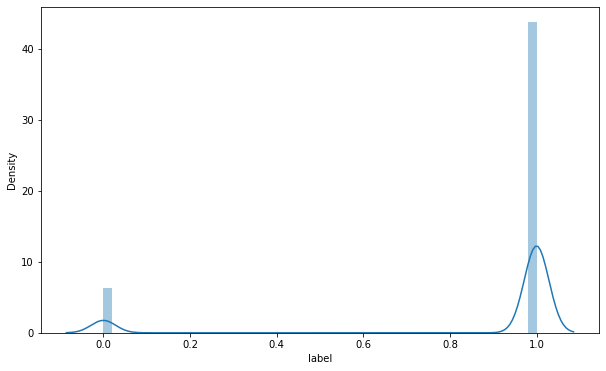

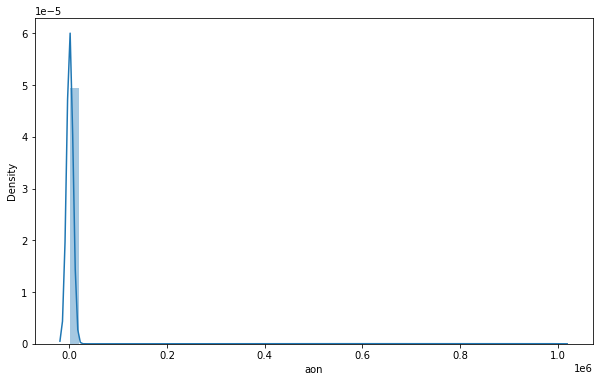

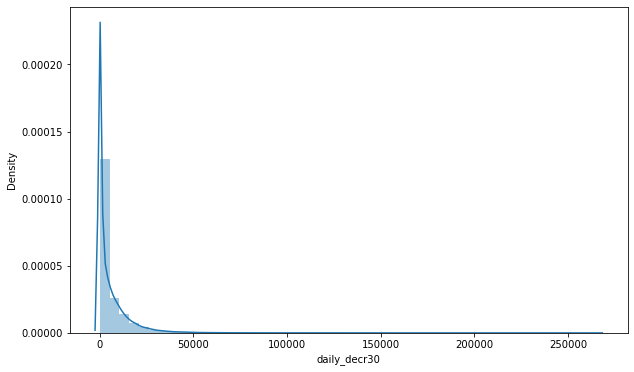

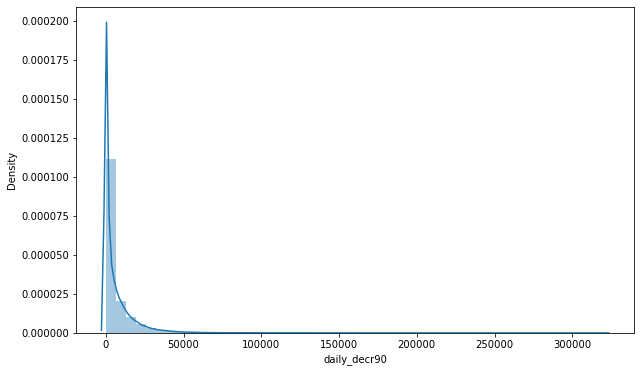

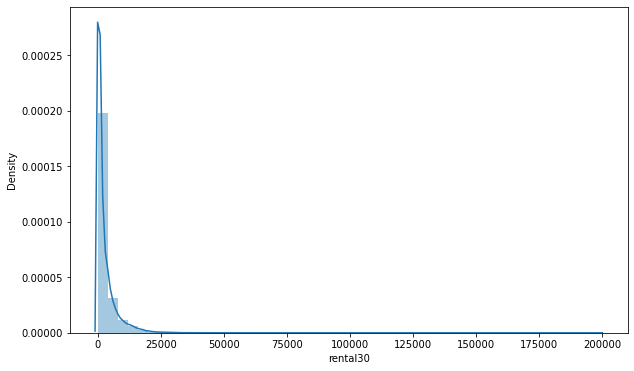

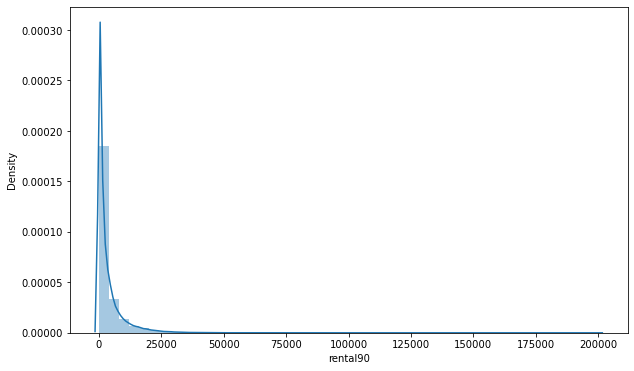

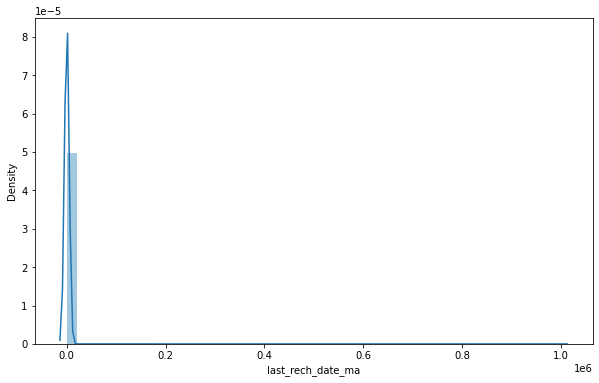

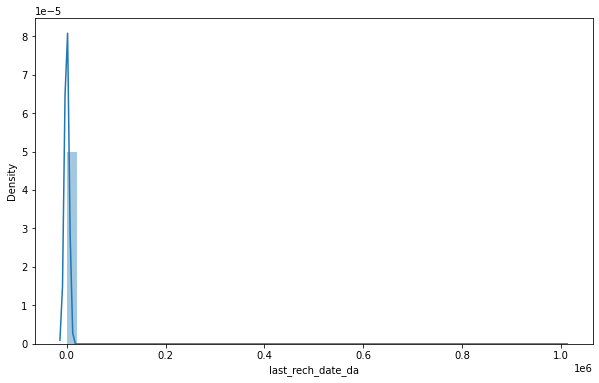

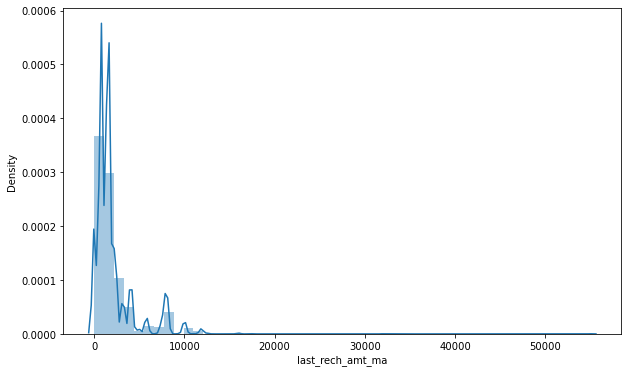

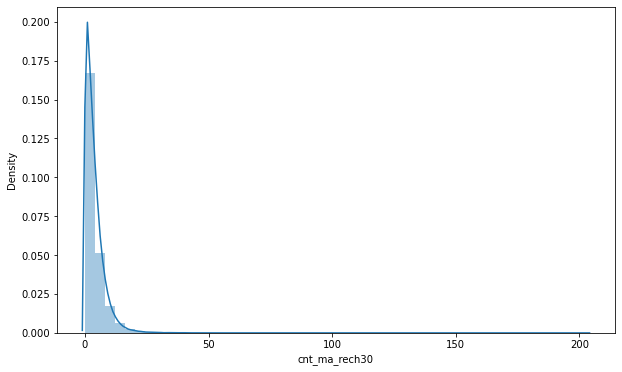

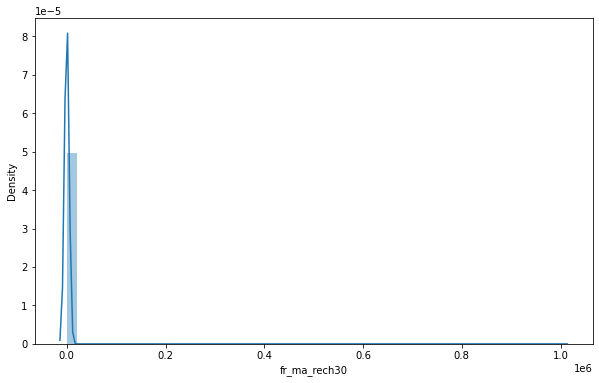

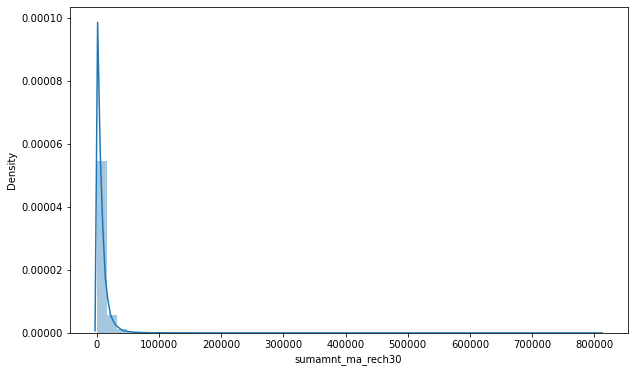

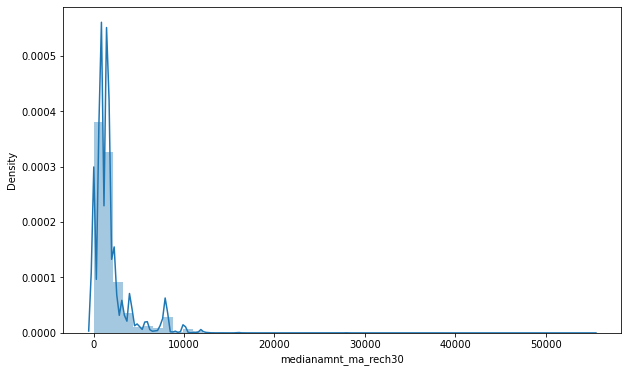

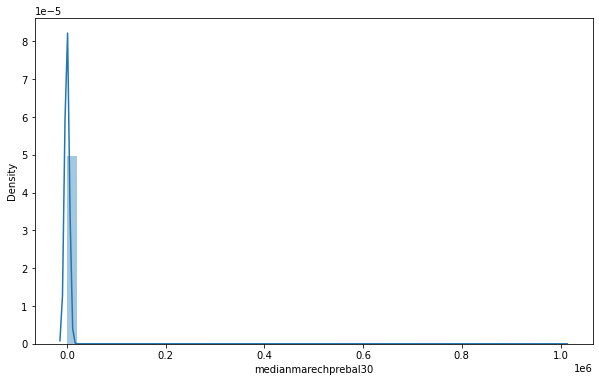

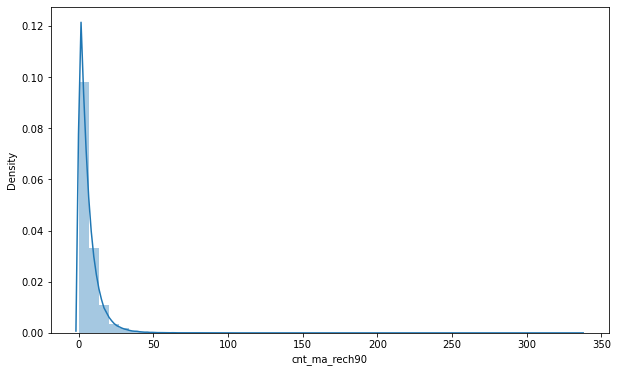

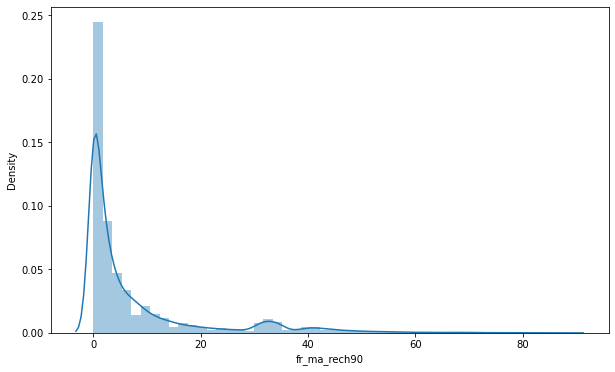

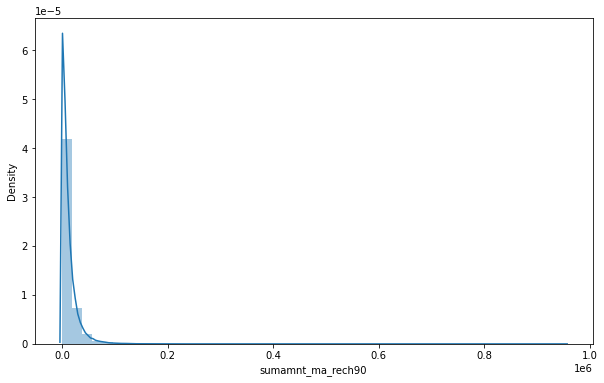

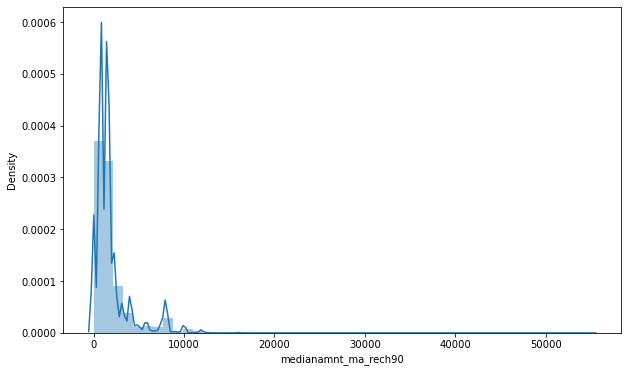

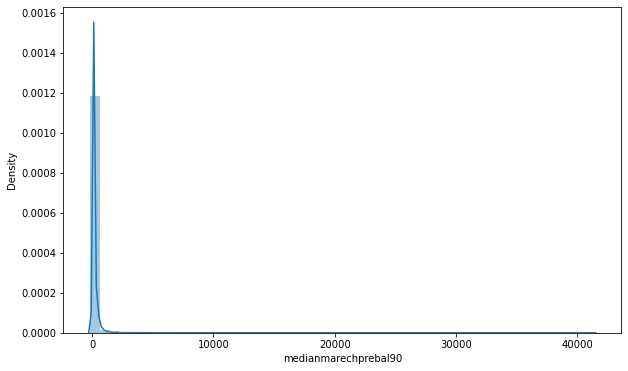

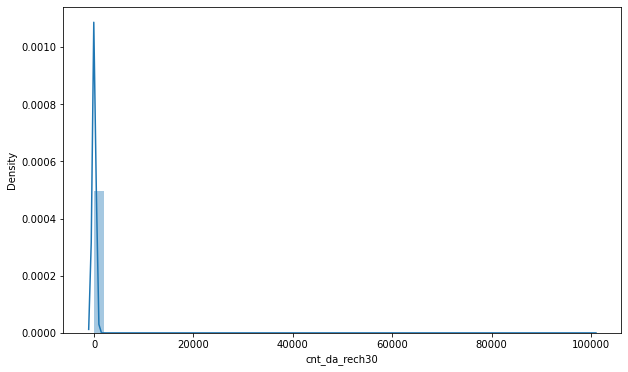

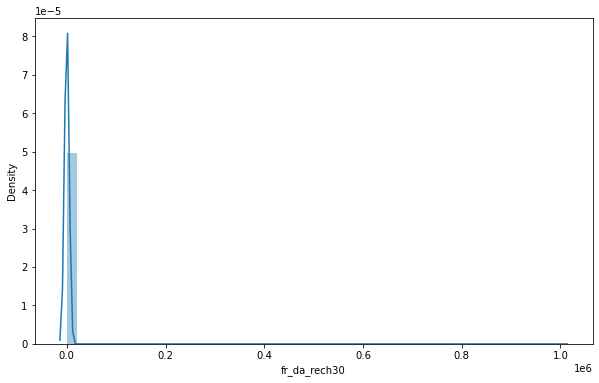

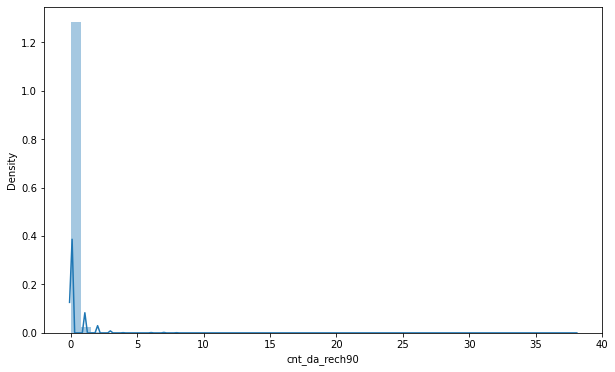

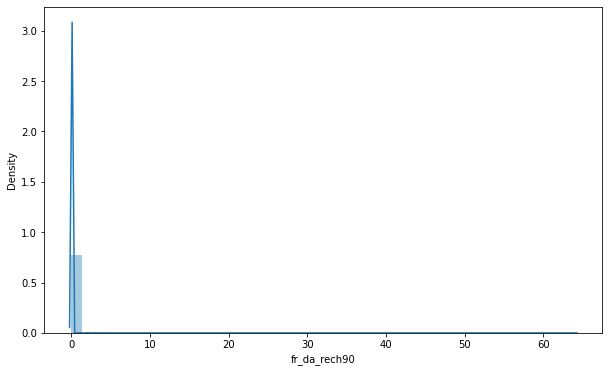

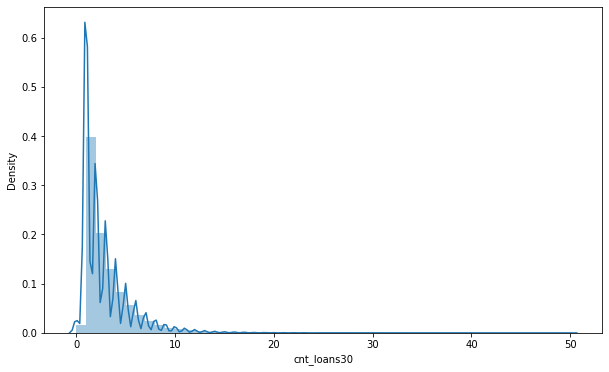

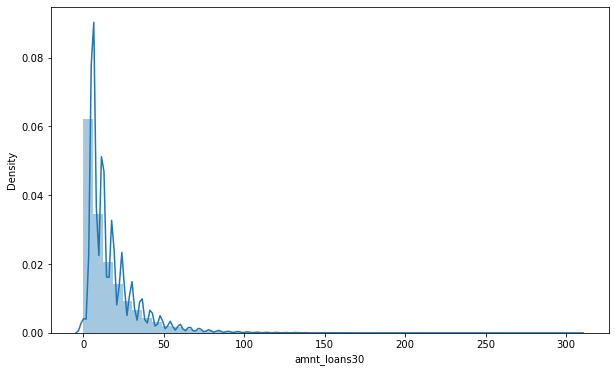

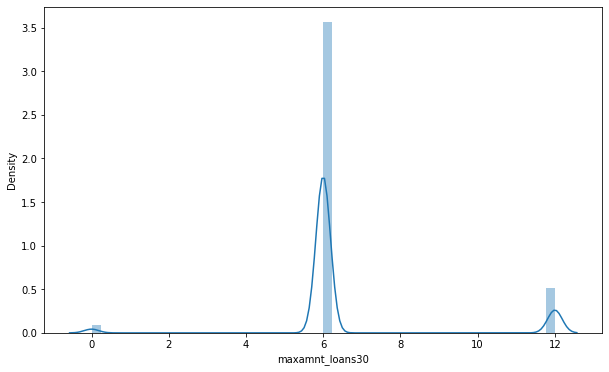

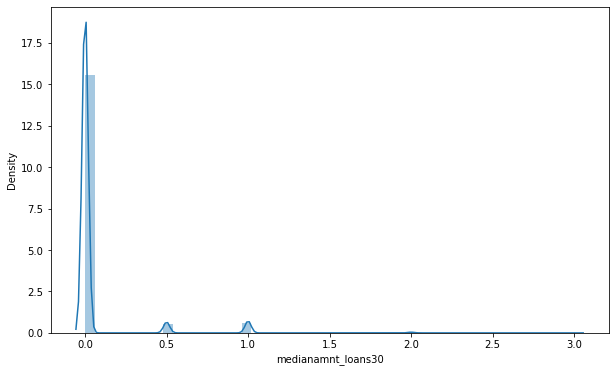

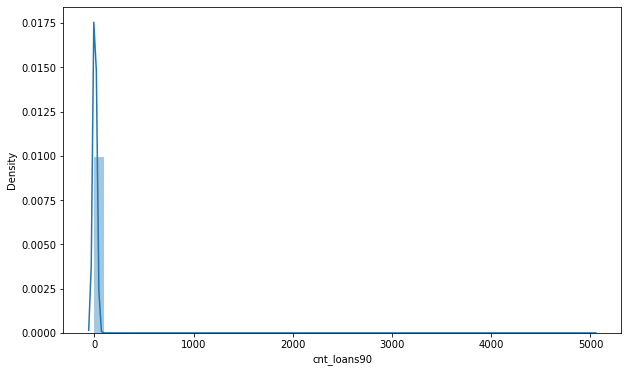

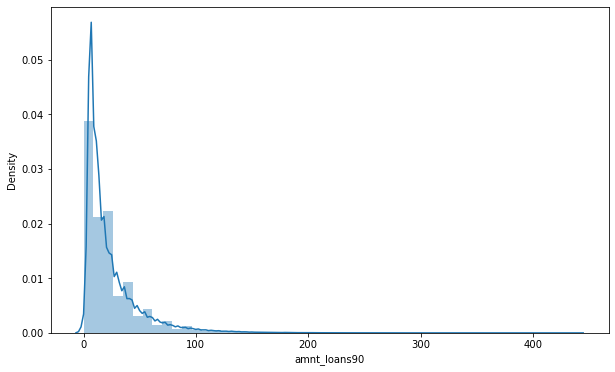

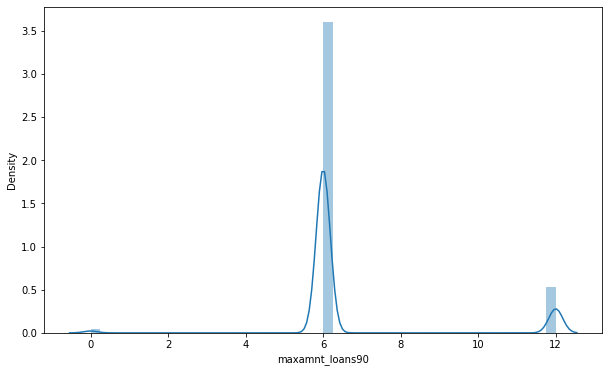

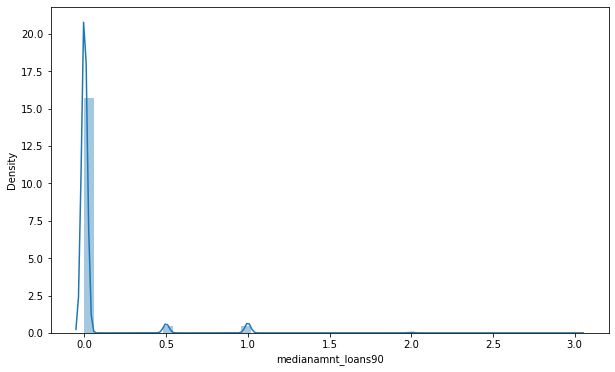

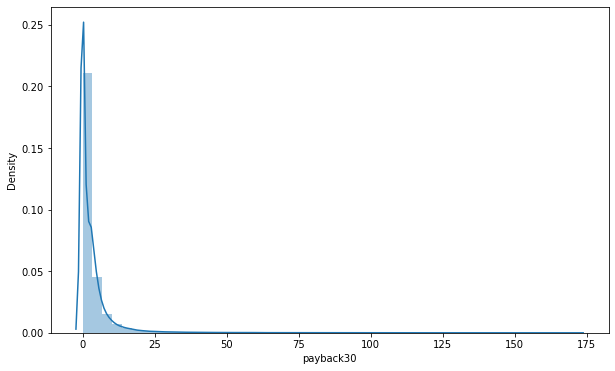

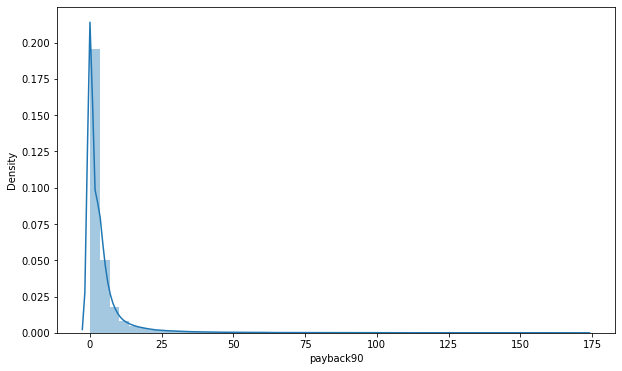

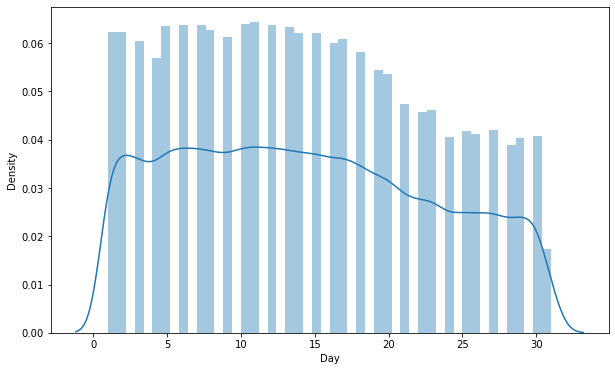

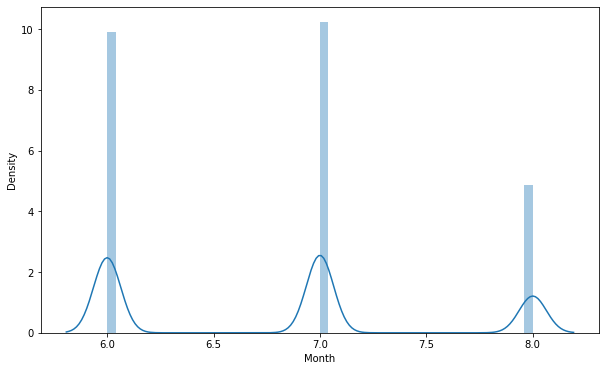

In [35]:
for i in df.columns:
  plt.figure(figsize=[10,6])
  sns.distplot(df[i])

In [36]:
df.skew()

label                   -2.270254
aon                     10.392951
daily_decr30             3.946246
daily_decr90             4.252578
rental30                 4.560510
rental90                 4.467282
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30          1.241879
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

 skewness is high so performing skewness removing method

In [37]:
#calculating the square root for data

df1 = np.sqrt(df)

df1.head(15)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
0,0.0,16.492423,55.272507,55.363797,14.836779,16.128546,1.414214,0.000000,39.230090,1.414214,...,2.449490,0.0,1.414214,3.464102,2.449490,0.0,5.385165,5.385165,4.472136,2.645751
1,1.0,26.683328,110.099955,110.112443,60.755740,60.755740,4.472136,0.000000,76.072334,1.000000,...,3.464102,0.0,1.000000,3.464102,3.464102,0.0,0.000000,0.000000,3.162278,2.828427
2,1.0,23.130067,37.389838,37.389838,30.002167,30.002167,1.732051,0.000000,39.230090,1.000000,...,2.449490,0.0,1.000000,2.449490,2.449490,0.0,0.000000,0.000000,4.358899,2.828427
3,1.0,15.524175,4.607385,4.607385,12.626163,12.626163,6.403124,0.000000,30.773365,0.000000,...,2.449490,0.0,1.414214,3.464102,2.449490,0.0,0.000000,0.000000,2.449490,2.449490
4,1.0,30.773365,12.272707,12.272707,33.149661,33.149661,2.000000,0.000000,48.052055,2.645751,...,2.449490,0.0,2.645751,6.480741,2.449490,0.0,1.527525,1.527525,4.690416,2.449490
5,1.0,23.832751,47.511711,47.554810,19.186714,19.496923,1.414214,0.000000,39.230090,2.000000,...,2.449490,0.0,1.732051,4.242641,2.449490,0.0,3.316625,2.886751,1.414214,2.645751
6,1.0,23.345235,53.634333,53.702607,18.323482,20.072369,3.605551,0.000000,76.072334,1.000000,...,2.449490,0.0,1.000000,2.449490,2.449490,0.0,0.000000,0.000000,2.236068,2.645751
7,1.0,27.712813,113.600176,133.432193,30.005833,50.488712,2.000000,7.416198,56.373753,1.732051,...,2.449490,0.0,2.645751,6.480741,2.449490,0.0,2.449490,1.963961,2.236068,2.828427
8,1.0,34.510868,9.523392,9.523392,47.827816,47.827816,1.000000,0.000000,39.230090,2.000000,...,2.449490,0.0,2.000000,4.898979,2.449490,0.0,1.632993,1.632993,3.872983,2.449490
9,1.0,23.151674,5.418241,5.418241,24.758029,24.758029,3.316625,0.000000,27.802878,1.000000,...,2.449490,0.0,1.000000,2.449490,2.449490,0.0,0.000000,0.000000,2.828427,2.449490


In [38]:
df1.skew()

label                   -2.270254
aon                      9.814709
daily_decr30             1.130169
daily_decr90             1.234454
rental30                 1.294750
rental90                 1.358978
last_rech_date_ma       14.231251
last_rech_date_da       14.242012
last_rech_amt_ma         0.802577
cnt_ma_rech30            0.362582
fr_ma_rech30            14.226866
sumamnt_ma_rech30        0.816228
medianamnt_ma_rech30     0.629621
medianmarechprebal30    13.933260
cnt_ma_rech90            0.618678
fr_ma_rech90             1.038194
sumamnt_ma_rech90        0.983177
medianamnt_ma_rech90     0.767860
medianmarechprebal90     4.182553
cnt_da_rech30           15.558988
fr_da_rech30            14.239832
cnt_da_rech90            8.187518
fr_da_rech90            19.692216
cnt_loans30              1.076620
amnt_loans30             1.151154
maxamnt_loans30         -1.871526
medianamnt_loans30       3.701226
cnt_loans90             13.841928
amnt_loans90             1.347151
maxamnt_loans9

since the skewness is not reduced much in square root transformation again performing cube root transformation on same data

In [39]:
#calculating the cube root for the column

df2 = np.cbrt(df1)

df2.head(15)
df=df2

In [40]:
df2.skew()

label                   -2.270254
aon                      6.037774
daily_decr30            -0.071687
daily_decr90            -0.024164
rental30                -0.723701
rental90                -0.599488
last_rech_date_ma        6.921141
last_rech_date_da       11.296809
last_rech_amt_ma        -1.900510
cnt_ma_rech30           -1.608780
fr_ma_rech30             4.464568
sumamnt_ma_rech30       -1.417171
medianamnt_ma_rech30    -1.683847
medianmarechprebal30     2.072666
cnt_ma_rech90           -1.709576
fr_ma_rech90            -0.413325
sumamnt_ma_rech90       -1.462184
medianamnt_ma_rech90    -1.973927
medianmarechprebal90    -1.056114
cnt_da_rech30           12.737370
fr_da_rech30            13.872648
cnt_da_rech90            6.120253
fr_da_rech90            16.042530
cnt_loans30             -2.307681
amnt_loans30            -2.157467
maxamnt_loans30         -5.968672
medianamnt_loans30       3.474769
cnt_loans90              3.540770
amnt_loans90            -1.066361
maxamnt_loans9

In [41]:
df2.shape

(209593, 35)

### 3)outlier using z score

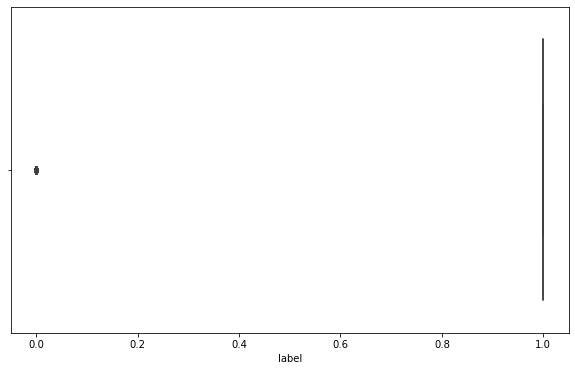

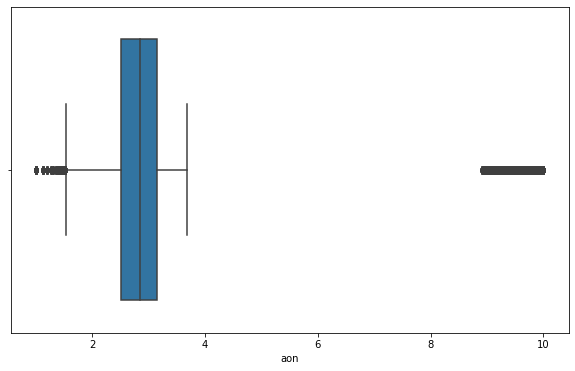

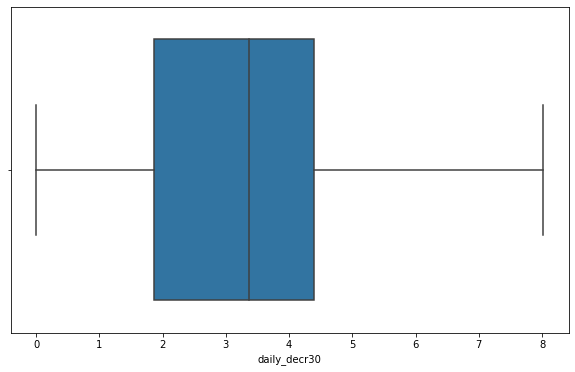

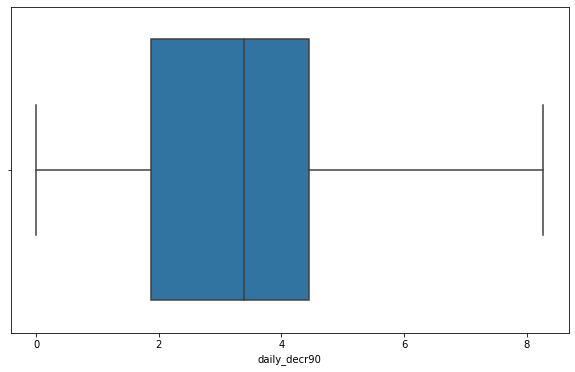

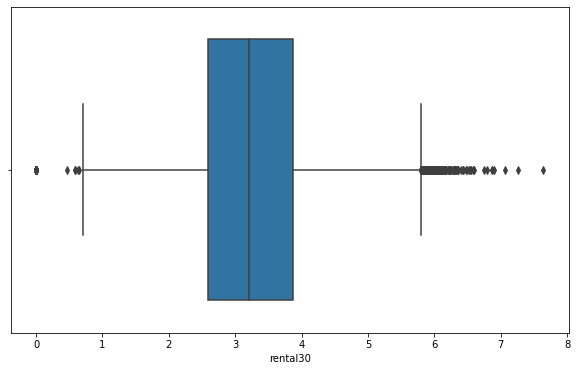

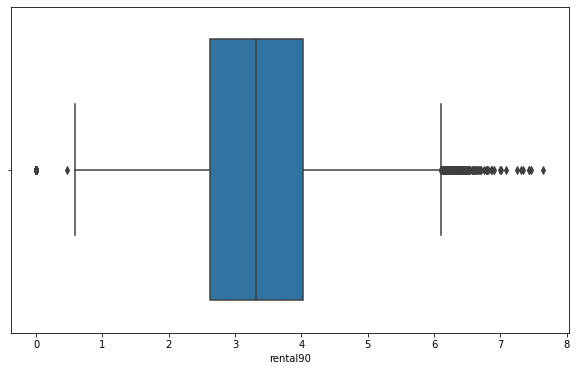

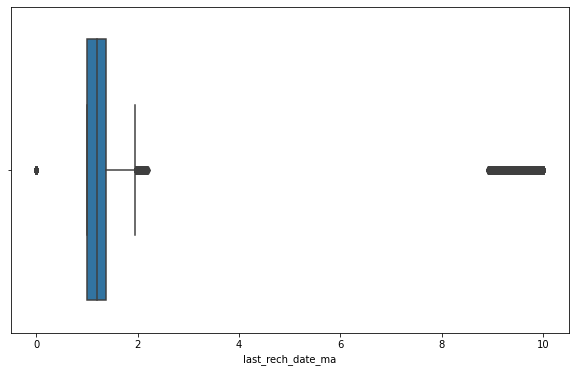

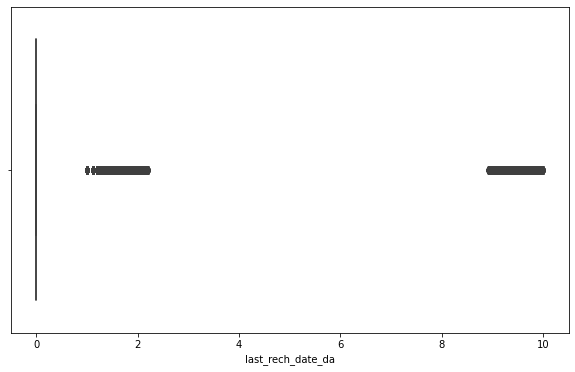

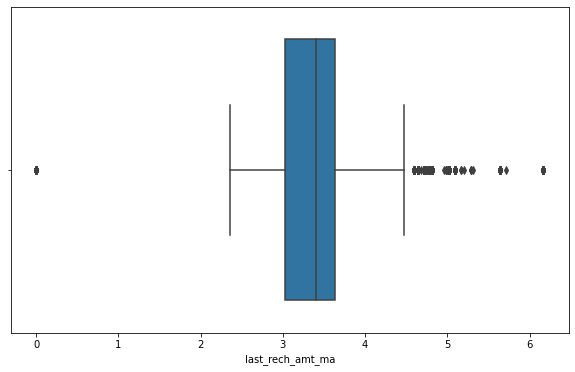

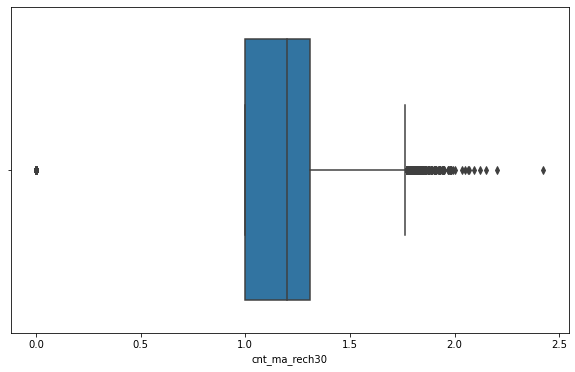

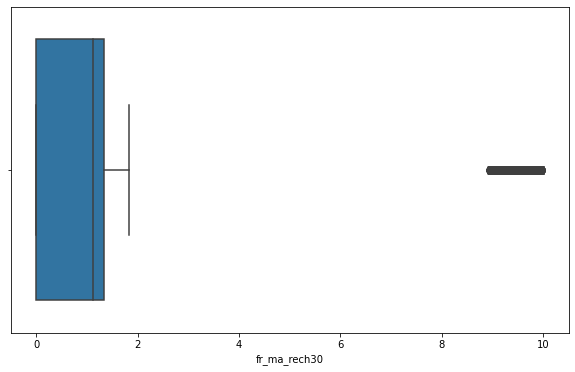

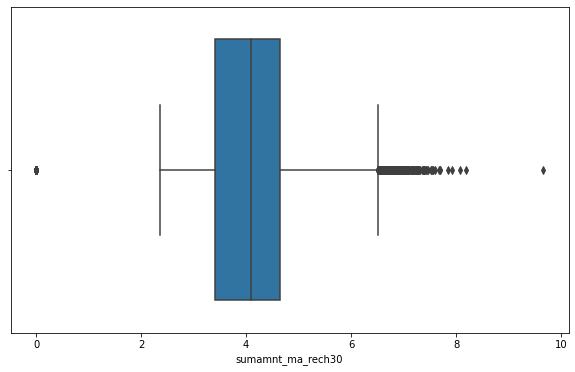

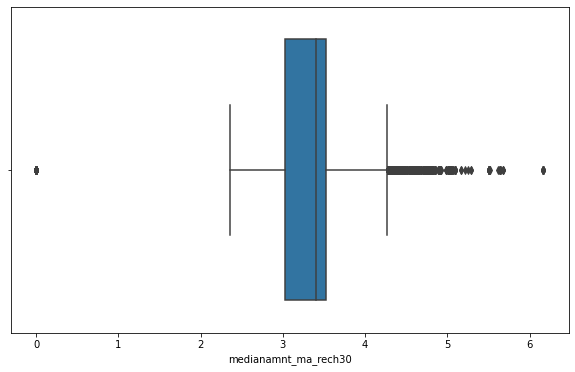

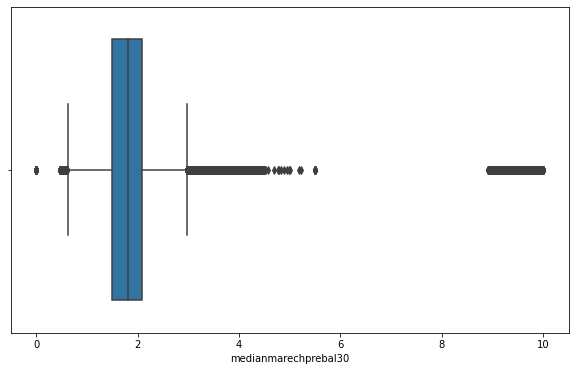

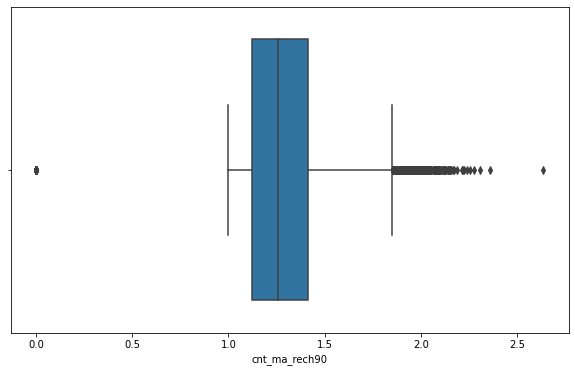

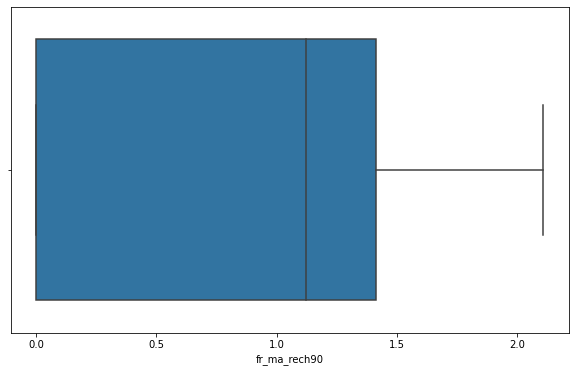

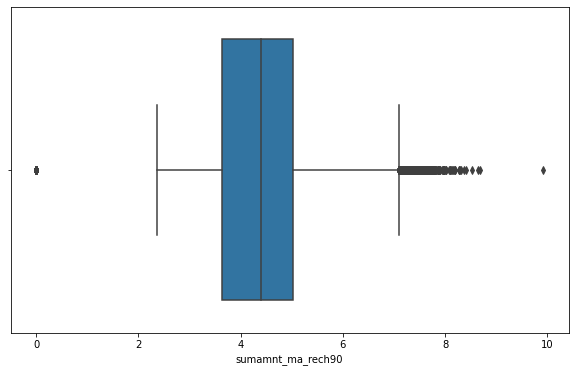

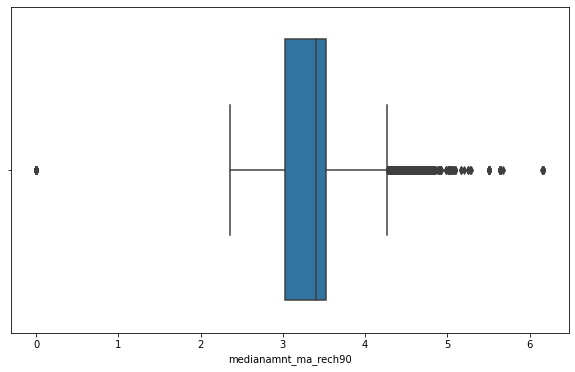

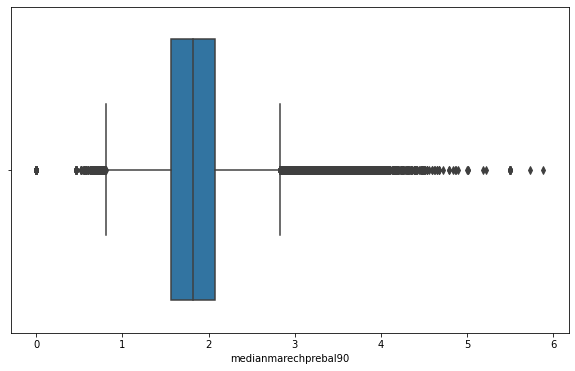

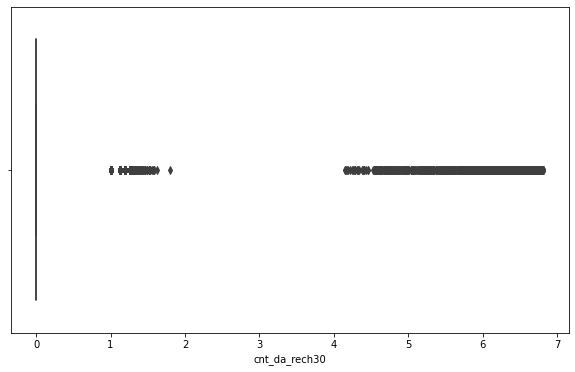

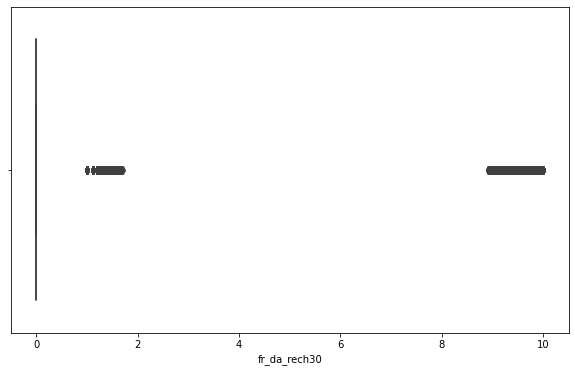

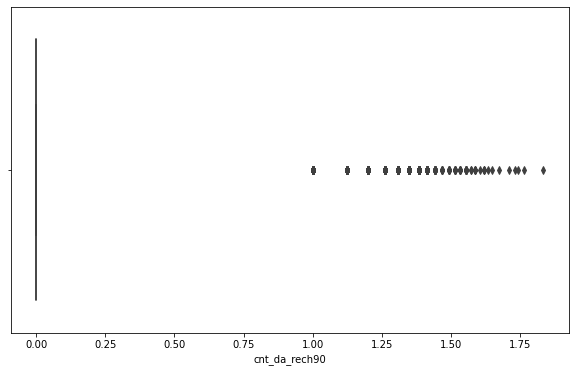

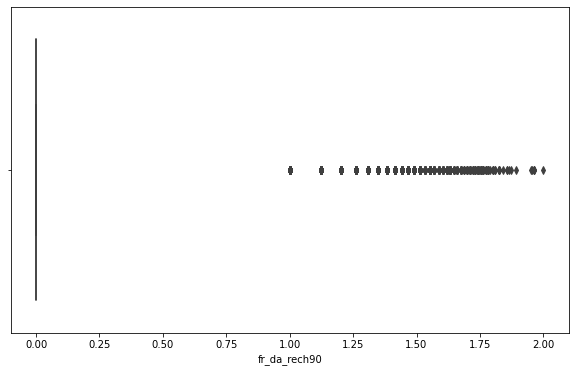

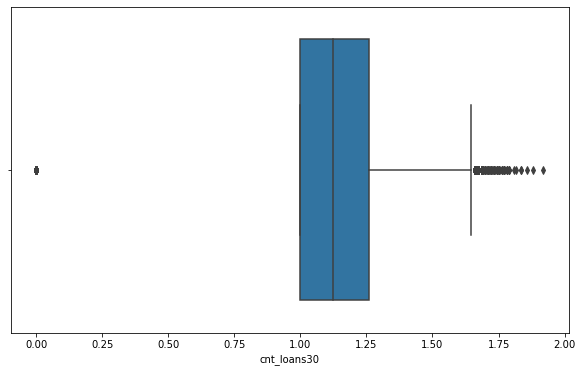

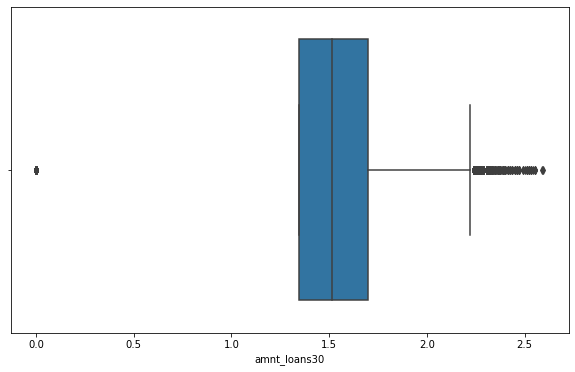

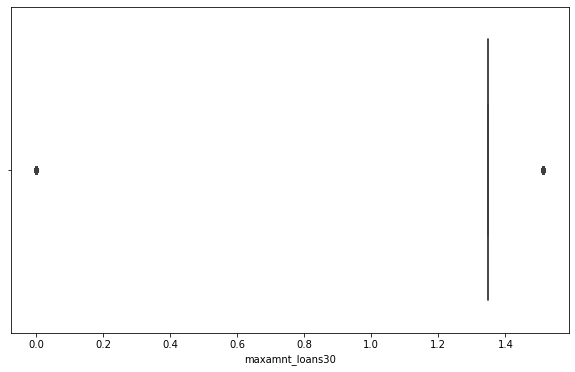

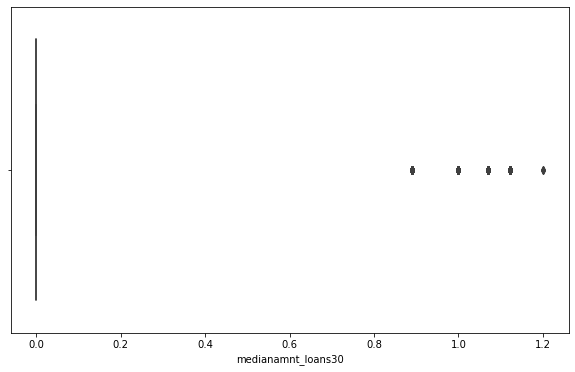

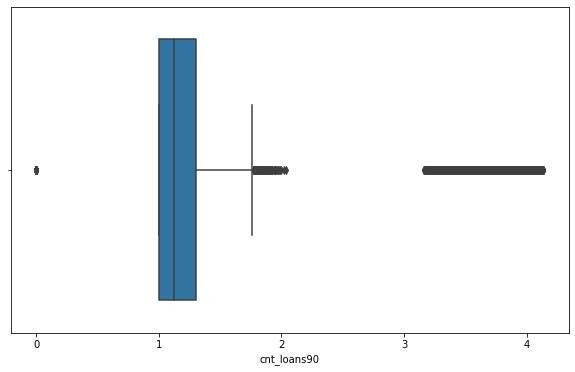

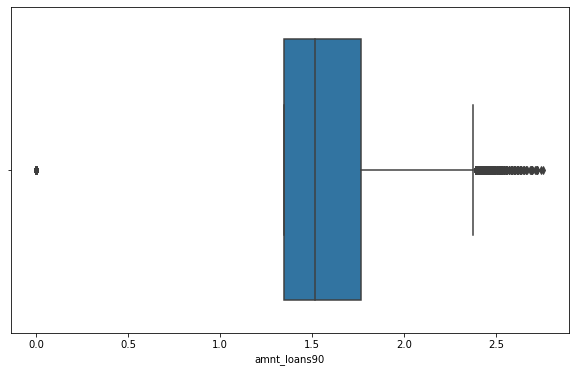

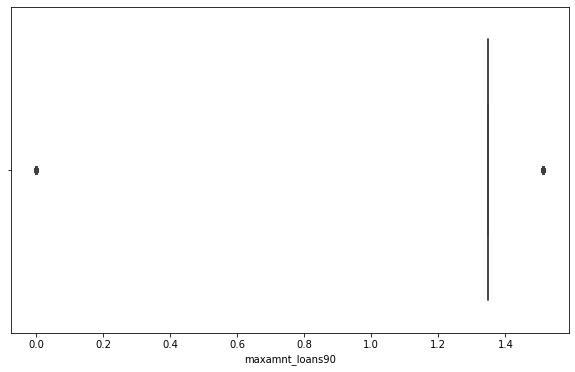

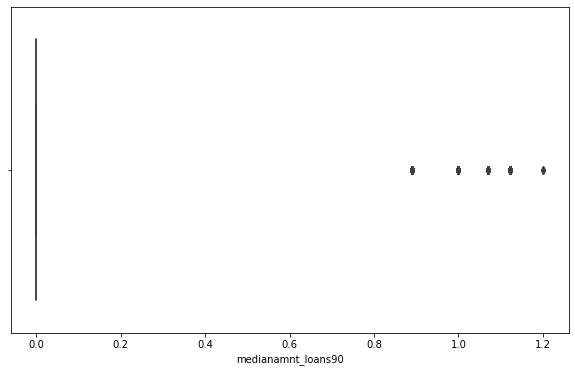

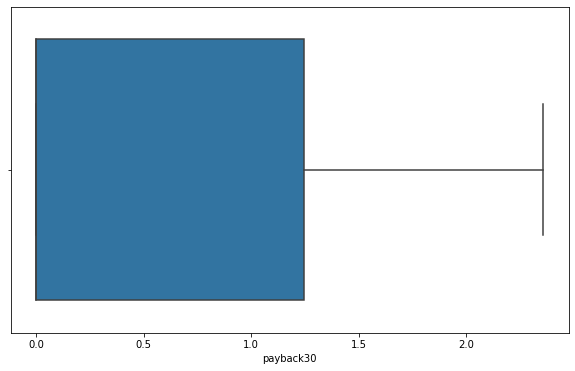

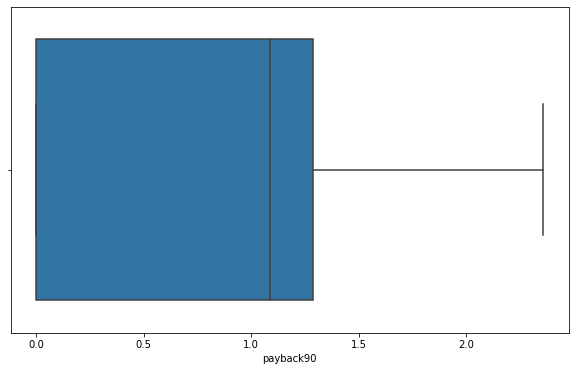

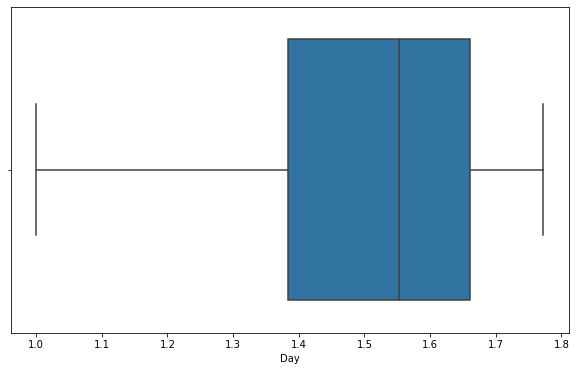

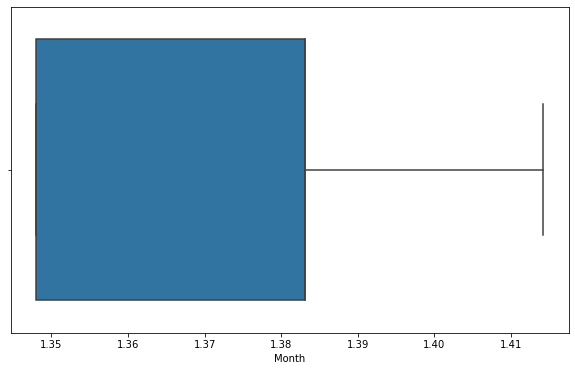

In [42]:
for i in df.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(df[i])

In [43]:
from scipy import stats
import numpy as np
print("Old Shape: ", df2.shape)   
z = np.abs(stats.zscore(df))
print(z)

Old Shape:  (209593, 35)
[[2.64789583 0.43042364 0.43323184 ... 1.5454021  0.71646998 0.31786604]
 [0.37765836 0.13722823 1.11762106 ... 1.06245367 0.20067152 1.573782  ]
 [0.37765836 0.0409766  0.10946456 ... 1.06245367 0.64491155 1.573782  ]
 ...
 [0.37765836 0.3690962  1.10470987 ... 0.79883329 1.25350805 0.31786604]
 [0.37765836 0.74900348 1.13420486 ... 1.1391989  1.03499272 0.31786604]
 [0.37765836 0.68197227 0.60882925 ... 1.06245367 0.63289826 0.31786604]]


In [44]:
threshold = 3
print(np.where(z > 3))

(array([     7,     30,     30, ..., 209587, 209587, 209591], dtype=int64), array([21,  6, 26, ..., 26, 30, 21], dtype=int64))


In [45]:
after_zscore = df[(z < 3).all(axis=1)]

In [46]:
after_zscore.shape

(0, 35)

#### Removing outliers using zscore is not suggested since we loose more than 20% of the data

In [47]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = df2.mean () + df2.std () * factor
lower_lim = df2.mean () - df2.std () * factor

data = df2[(df2 < upper_lim) & (df2 > lower_lim)]

 After performing this droping the outliers methord creates Nan values. so now we can replace null values by median data.

In [48]:
data.shape

(209593, 35)

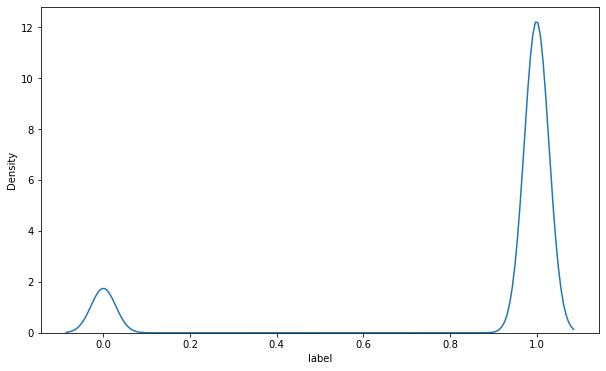

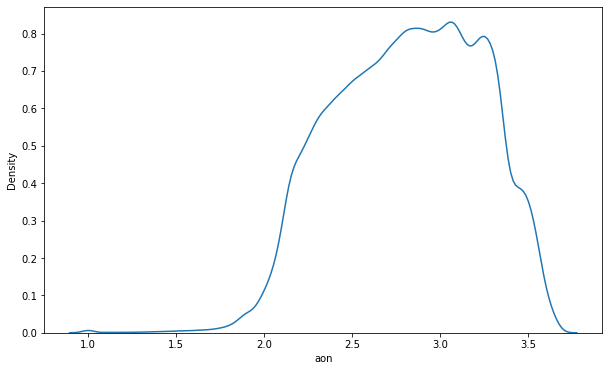

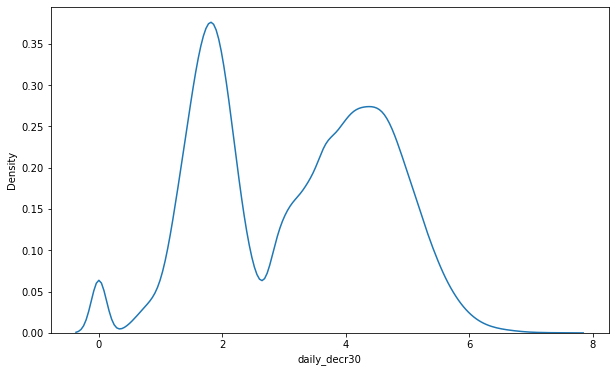

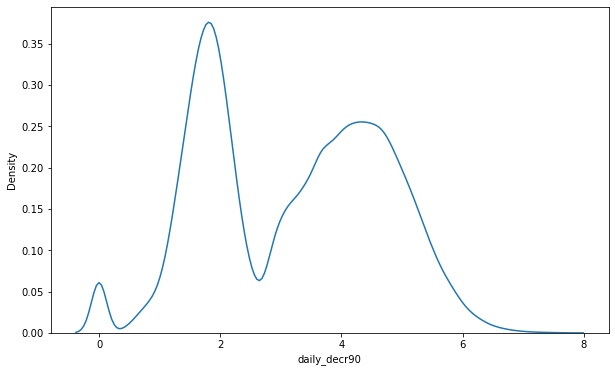

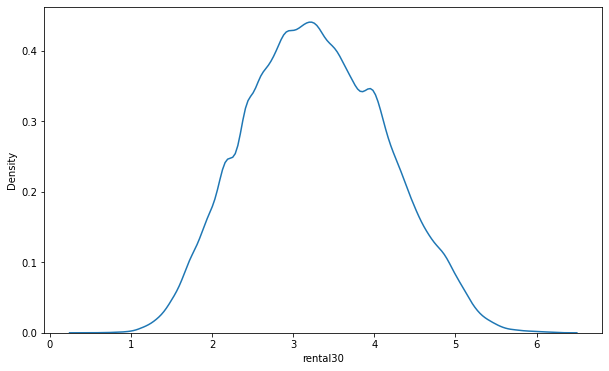

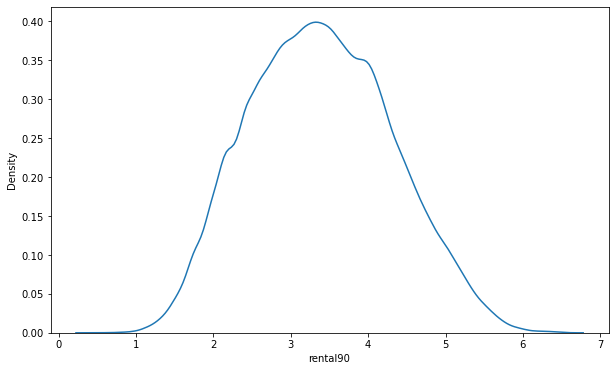

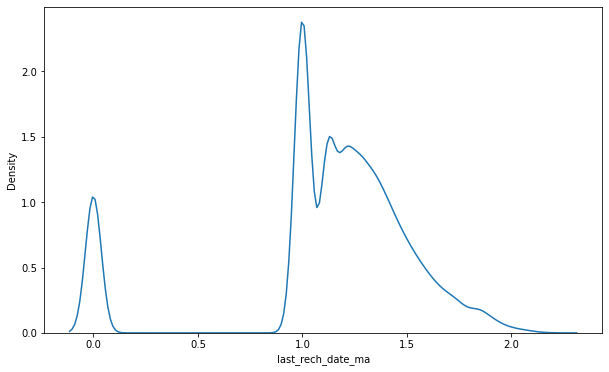

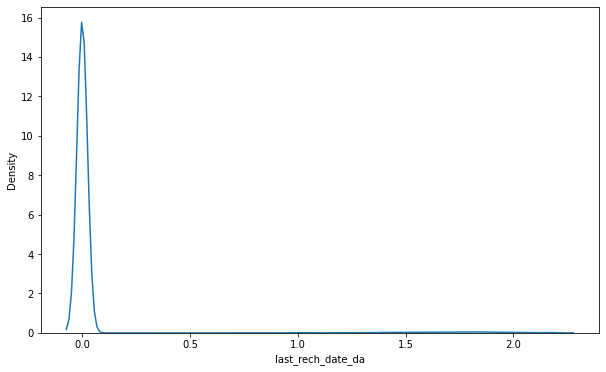

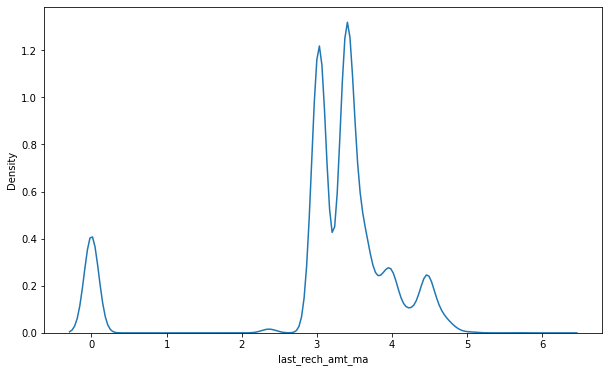

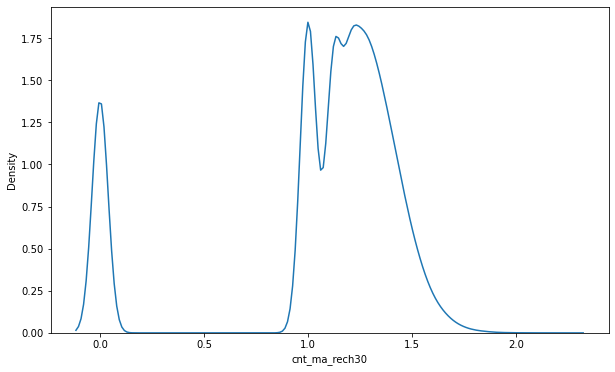

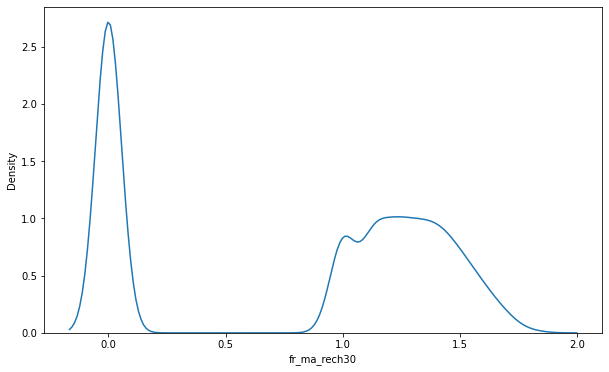

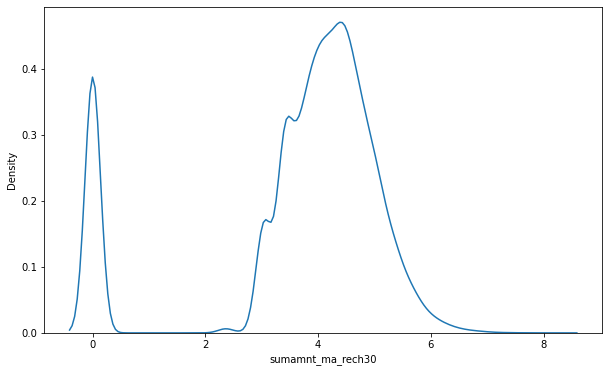

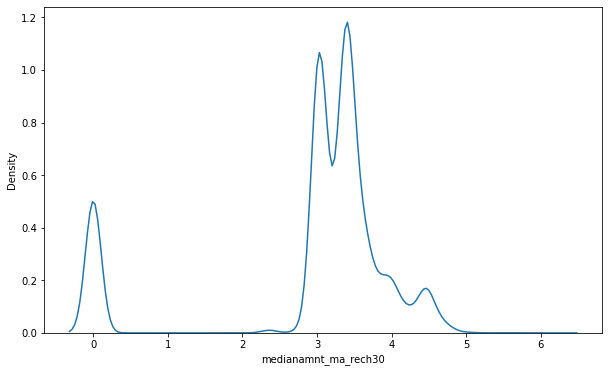

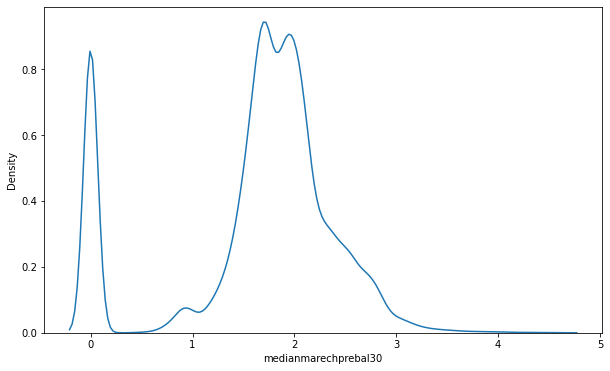

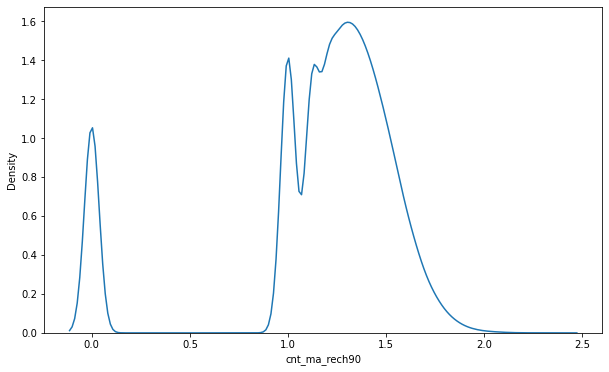

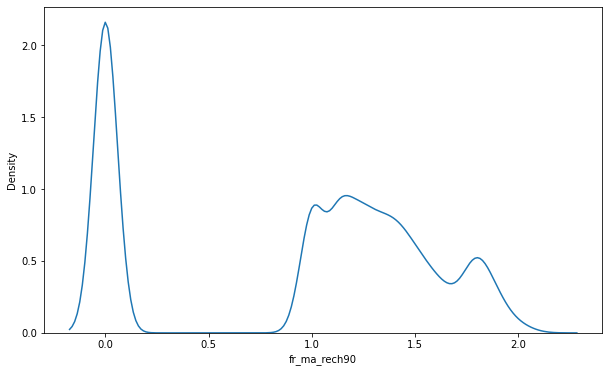

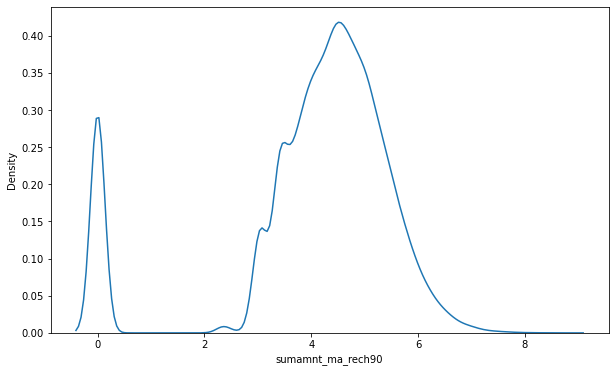

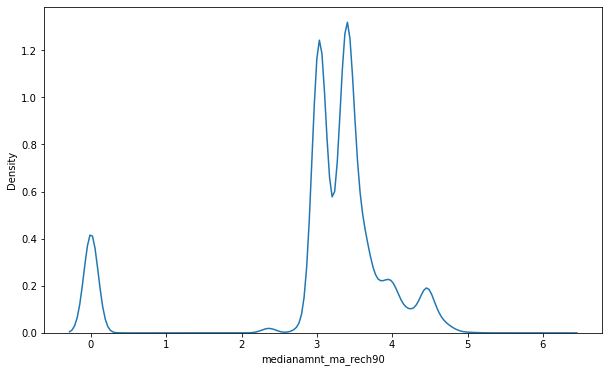

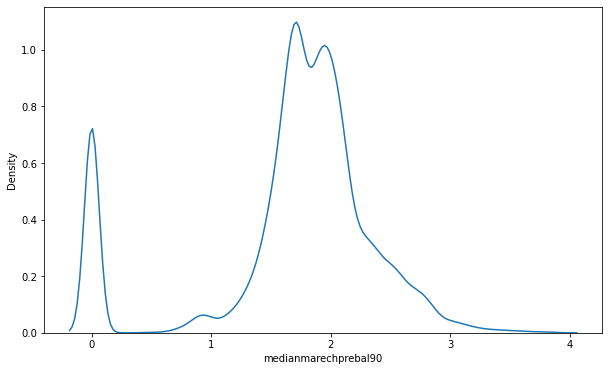

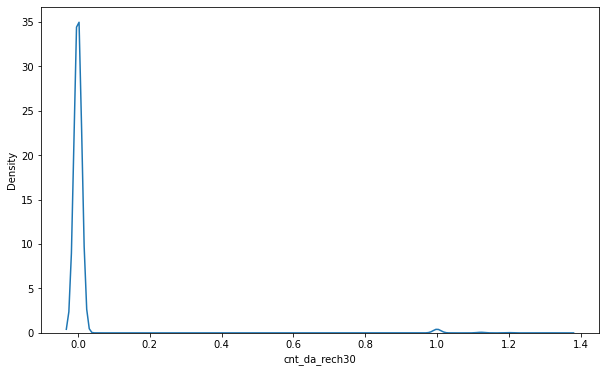

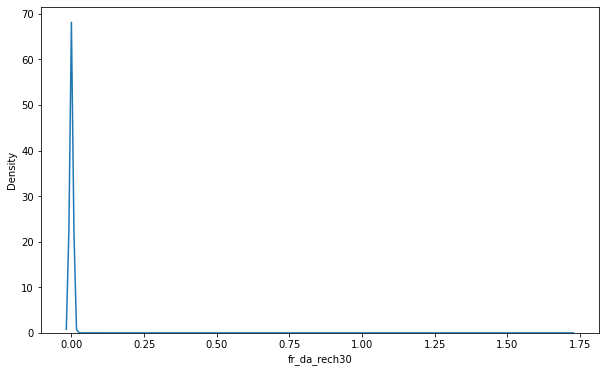

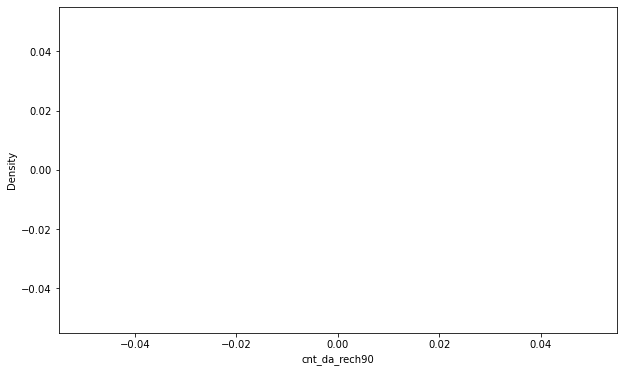

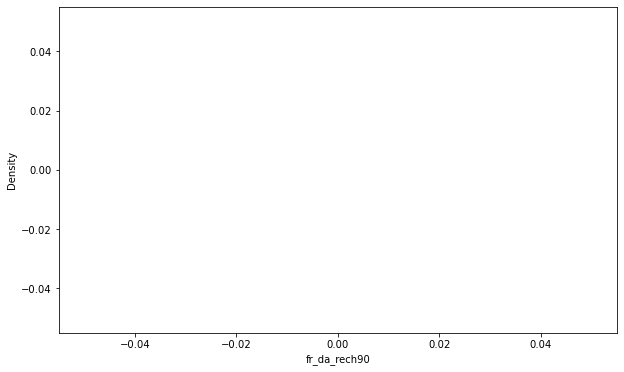

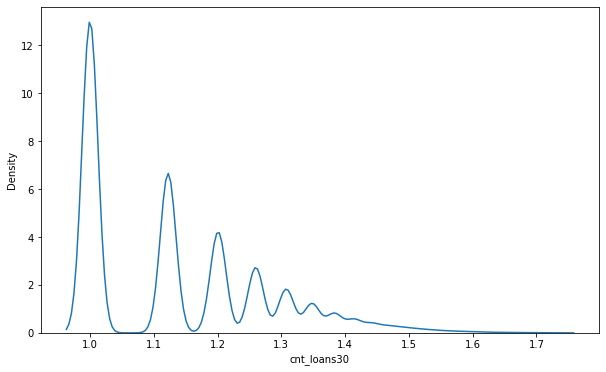

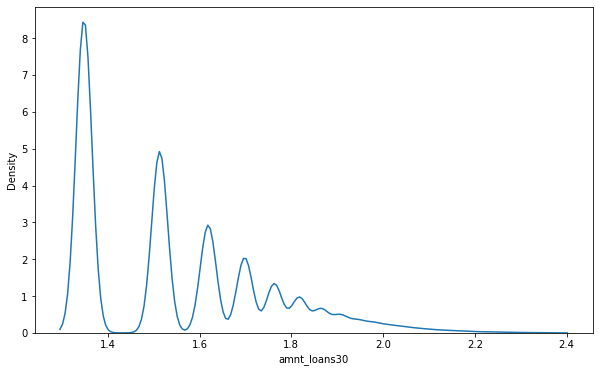

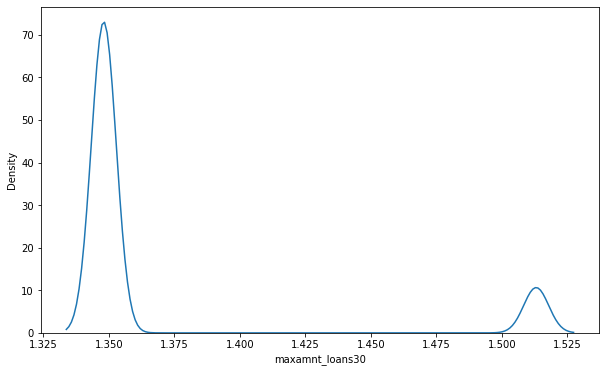

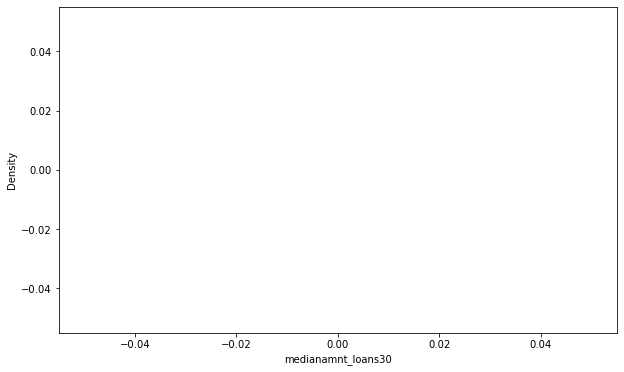

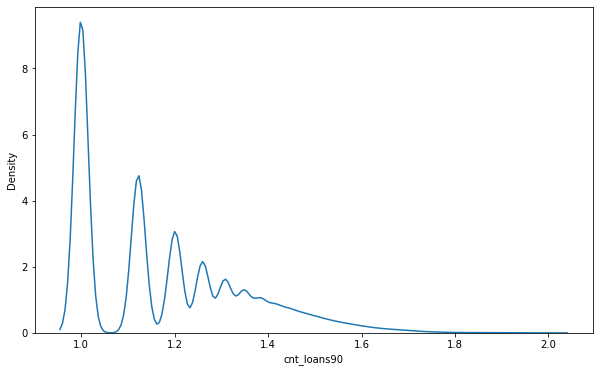

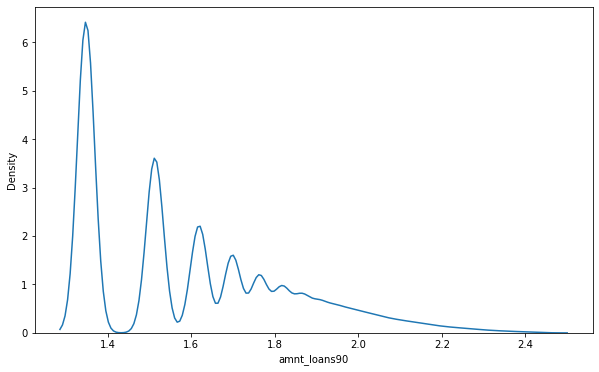

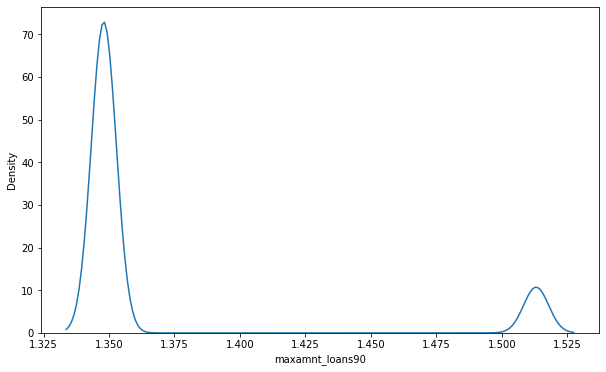

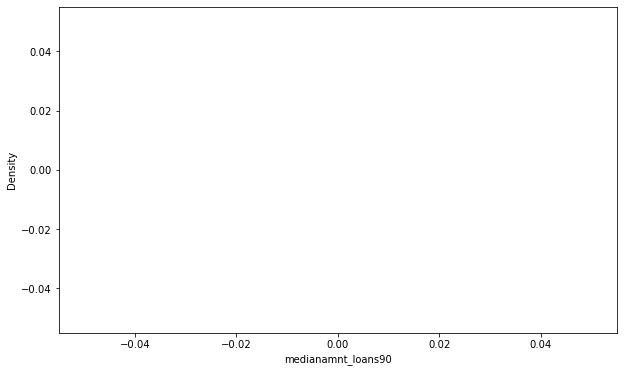

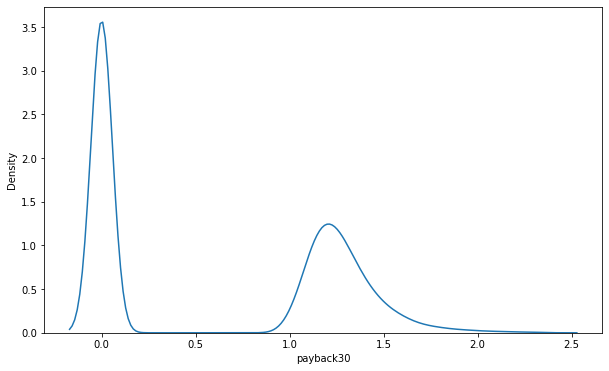

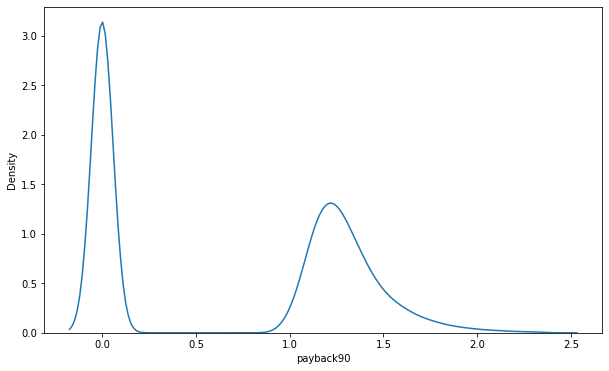

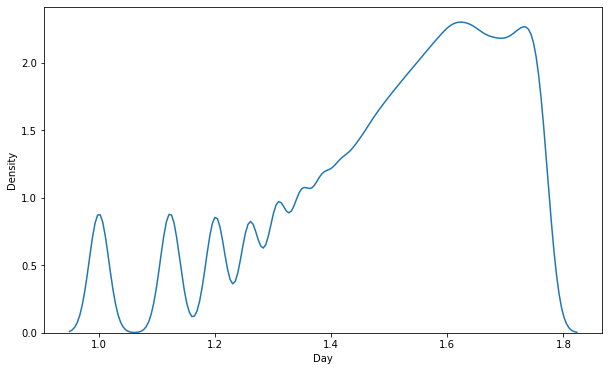

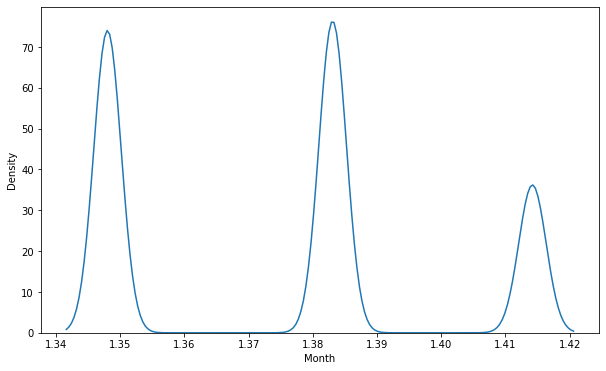

In [49]:
for i in data.columns:
    plt.figure(figsize=[10,6])
    sns.kdeplot(data[i])

In [50]:
df.isnull().sum()

label                      0
aon                        0
daily_decr30               0
daily_decr90               0
rental30                   0
rental90                   0
last_rech_date_ma          0
last_rech_date_da          0
last_rech_amt_ma           0
cnt_ma_rech30              0
fr_ma_rech30               0
sumamnt_ma_rech30          0
medianamnt_ma_rech30       0
medianmarechprebal30    1646
cnt_ma_rech90              0
fr_ma_rech90               0
sumamnt_ma_rech90          0
medianamnt_ma_rech90       0
medianmarechprebal90    1730
cnt_da_rech30              0
fr_da_rech30               0
cnt_da_rech90              0
fr_da_rech90               0
cnt_loans30                0
amnt_loans30               0
maxamnt_loans30            0
medianamnt_loans30         0
cnt_loans90                0
amnt_loans90               0
maxamnt_loans90            0
medianamnt_loans90         0
payback30                  0
payback90                  0
Day                        0
Month         

Replacing null values with median data.

In [51]:

median=df['medianmarechprebal30'].median()
df['medianmarechprebal30'] = df['medianmarechprebal30'].replace(np.nan,median)

median=df['medianmarechprebal90'].median()
df['medianmarechprebal90'] = df['medianmarechprebal90'].replace(np.nan,median)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  float64
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  float64
 9   cnt_ma_rech30         209593 non-null  float64
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  float64
 15  

# 4.Feature Engineering

### 1)Test Train split

In [55]:
from sklearn.model_selection import train_test_split

x= df.drop(columns='label')
y= df['label']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

### 1) Balanceing Imbalanced target feature

In [56]:
print(df['label'].value_counts())

1.0    183431
0.0     26162
Name: label, dtype: int64


In [57]:
from sklearn.utils import resample

In [58]:
import pandas as pd

In [59]:
X=pd.concat([x_train,y_train],axis=1)
label0=X[X.label==0]
label1=X[X.label==1]
label_unsampled=resample(label0,replace=True,n_samples=len(label1),random_state=27)
unsampled=pd.concat([label1,label_unsampled])
unsampled.label.value_counts()

0.0    146825
1.0    146825
Name: label, dtype: int64

In [60]:
x_train= unsampled.drop(columns='label')
y_train= unsampled['label']

In [61]:
df.shape

(209593, 35)

#### 2)Min Max scaling

In [62]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

In [63]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,293650.000000,293650.000000,293650.000000,293650.000000,293650.000000,293650.000000,293650.000000,293650.000000,293650.000000,293650.000000,...,293650.000000,293650.000000,293650.000000,293650.000000,293650.000000,293650.000000,293650.000000,293650.000000,293650.000000,293650.000000
mean,0.204297,0.352072,0.343230,0.408260,0.410833,0.108408,0.008460,0.439916,0.399131,0.064111,...,0.888060,0.043531,0.273079,0.551828,0.895622,0.038667,0.191963,0.219008,0.658635,0.346646
std,0.090540,0.196629,0.193441,0.166103,0.168405,0.081730,0.070253,0.235065,0.245230,0.090853,...,0.109986,0.180959,0.062811,0.090459,0.074114,0.170971,0.271649,0.284595,0.247211,0.339969
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.159568,0.196743,0.190915,0.331289,0.325139,0.100023,0.000000,0.490932,0.000000,0.000000,...,0.890899,0.000000,0.241847,0.491425,0.890899,0.000000,0.000000,0.000000,0.495974,0.000000
50%,0.198932,0.366958,0.355459,0.426888,0.428152,0.120121,0.000000,0.493035,0.509005,0.000000,...,0.890899,0.000000,0.241847,0.491425,0.890899,0.000000,0.000000,0.000000,0.715261,0.529871
75%,0.235158,0.512006,0.497407,0.519526,0.524670,0.141453,0.000000,0.551469,0.571339,0.126000,...,0.890899,0.000000,0.290443,0.590170,0.890899,0.000000,0.500081,0.521473,0.855782,0.529871
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
x_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,41919.000000,41919.000000,41919.000000,41919.000000,41919.000000,41919.000000,41919.000000,41919.000000,41919.000000,41919.000000,...,41919.000000,41919.000000,41919.000000,41919.000000,41919.000000,41919.000000,41919.000000,41919.000000,41919.000000,41919.000000
mean,0.208701,0.411582,0.402457,0.434388,0.439645,0.118720,0.009392,0.504740,0.482702,0.083316,...,0.886501,0.052076,0.284679,0.577544,0.896256,0.045013,0.266808,0.301121,0.655520,0.410858
std,0.085223,0.186256,0.184864,0.143523,0.147023,0.076305,0.072432,0.182887,0.203408,0.086405,...,0.131895,0.197033,0.065835,0.104436,0.094609,0.183887,0.280033,0.285840,0.253717,0.374632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166834,0.241221,0.233442,0.354935,0.351205,0.100023,0.000000,0.490932,0.453472,0.000000,...,0.890899,0.000000,0.241847,0.491425,0.890899,0.000000,0.000000,0.000000,0.495974,0.000000
50%,0.204780,0.435657,0.423629,0.440820,0.445203,0.120121,0.000000,0.550993,0.544591,0.112254,...,0.890899,0.000000,0.271464,0.551606,0.890899,0.000000,0.000000,0.460456,0.715261,0.529871
75%,0.238959,0.568506,0.556318,0.531916,0.539288,0.138340,0.000000,0.589536,0.592987,0.134809,...,0.890899,0.000000,0.316254,0.642617,0.890899,0.000000,0.528476,0.545651,0.855782,0.529871
max,0.999913,1.038330,1.035867,1.051655,1.028196,0.999837,0.999791,1.000000,1.099343,0.999920,...,1.000000,1.000000,0.999330,1.004641,1.000000,1.000000,1.000975,1.000975,1.000000,1.000000


# 5. Building the model

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### 1.Random Forest Classifier

In [68]:
clf= RandomForestClassifier(n_estimators=700).fit(x_train, y_train)
predRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,predRFC)
randomforest_accu
#print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

              precision    recall  f1-score   support

         0.0       0.72      0.58      0.64      5313
         1.0       0.94      0.97      0.95     36606

    accuracy                           0.92     41919
   macro avg       0.83      0.78      0.80     41919
weighted avg       0.91      0.92      0.91     41919



In [69]:
randomforest_accu

0.9180323958109687

#### cross validation score

In [70]:
from sklearn.model_selection import cross_val_score
randomforest_cv= cross_val_score(clf,x,y,scoring='accuracy', cv = 3).mean()
randomforest_cv

0.9212235161437053

### 2.SVC

In [71]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import LinearSVC
#svc=SVC(kernel='rbf')
#svc.fit(x_train,y_train)

svc = LinearSVC(random_state=0, tol=1e-5)
svc.fit(x_train, y_train.ravel()) 


svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
svc_acc=accuracy_score(y_test,predsvc)
print(svc_acc)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7500178916481787
[[ 4071  1242]
 [ 9237 27369]]
              precision    recall  f1-score   support

         0.0       0.31      0.77      0.44      5313
         1.0       0.96      0.75      0.84     36606

    accuracy                           0.75     41919
   macro avg       0.63      0.76      0.64     41919
weighted avg       0.87      0.75      0.79     41919



#### cross validation score

In [72]:
from sklearn.model_selection import GridSearchCV, cross_val_score
svc_cv=cross_val_score(svc,x,y,scoring='accuracy', cv = 3).mean()
svc_cv

0.8891899986556714

### 3.DecisionTreeClassifier

In [73]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model_dt = DecisionTreeClassifier()

# feeding the training set into the model
model_dt.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_dt.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_dt.score(x_train, y_train))
print("Testing accuracy :", model_dt.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 0.9999829729269538
Testing accuracy : 0.8825115102936616
              precision    recall  f1-score   support

         0.0       0.54      0.53      0.53      5313
         1.0       0.93      0.93      0.93     36606

    accuracy                           0.88     41919
   macro avg       0.73      0.73      0.73     41919
weighted avg       0.88      0.88      0.88     41919

[[ 2825  2488]
 [ 2437 34169]]
accuracy_score : 0.8825115102936616


In [74]:
from sklearn.model_selection import cross_val_score
dtc_cv=cross_val_score(model_dt,x,y,scoring='accuracy', cv = 5).mean()
dtc_cv

0.8840323867213048

### 4.GaussianNB

In [75]:
from sklearn.naive_bayes import GaussianNB
# creating model
model_gnb = GaussianNB()

# feeding the training set into the model
model_gnb.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_gnb.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_gnb.score(x_train, y_train))
print("Testing accuracy :", model_gnb.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 0.7412838413076792
Testing accuracy : 0.7499940361172738
              precision    recall  f1-score   support

         0.0       0.30      0.72      0.42      5313
         1.0       0.95      0.75      0.84     36606

    accuracy                           0.75     41919
   macro avg       0.62      0.74      0.63     41919
weighted avg       0.87      0.75      0.79     41919

[[ 3809  1504]
 [ 8976 27630]]
accuracy_score : 0.7499940361172738


In [76]:
gnb_cv=cross_val_score(model_gnb,x,y,scoring='accuracy', cv = 5).mean()
gnb_cv

0.7905655486449258

### 5.KNeighborsClassifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

KNN.fit(x_train,y_train)

predKNN = KNN.predict(x_test)

reportKNN = classification_report(y_test,predKNN, output_dict = True)

crKNN = pd.DataFrame(reportKNN).transpose()
knn_acc=accuracy_score(y_test,predKNN)
print(knn_acc)
crKNN

0.8342279157422648


,precision,recall,f1-score,support
0.0,0.412137,0.722191,0.524790,5313.000000
1.0,0.954736,0.850489,0.899603,36606.000000
accuracy,0.834228,0.834228,0.834228,0.834228
macro avg,0.683437,0.786340,0.712196,41919.000000
weighted avg,0.885965,0.834228,0.852097,41919.000000


In [80]:
knn_cv=cross_val_score(KNN,x,y,scoring='accuracy', cv = 3)
knn_cv.mean()

0.9048393774433601

# 6.Hyper parameter tuning

#### FINDING BEST random_state

In [84]:
#FINDING BEST RANDOM STATE

from sklearn.metrics import r2_score
d=5
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    model_dt.fit(x_train,y_train)
    pred_train=model_dt.predict(x_train)
    pred_test = model_dt.predict(x_test)
    a=r2_score(y_train,pred_train)
    b=r2_score(y_test,pred_test)
    c=a-b
    print(i,c)
    if d>=c:
        d=c
        print("least value",i,d)

0 1.0638971228499488
least value 0 1.0638971228499488
1 1.0536045397624003
least value 1 1.0536045397624003
2 1.0395929026576276
least value 2 1.0395929026576276
3 1.0617883396736083
4 1.0395018500304303
least value 4 1.0395018500304303
5 1.0689491154923423
6 1.0413815661878236
7 1.053594007524409
8 1.0391720547692778
least value 8 1.0391720547692778
9 1.069848701073726
10 1.052373677571219
11 1.0685380721278772
12 1.0451797526327704
13 1.060829276893588
14 1.070773379134447
15 1.0661320256901625
16 1.0743080777338467
17 1.0602336448718246
18 1.0737155570967296
19 1.0677185215299176
20 1.0318214434085733
least value 20 1.0318214434085733
21 1.051495229581402
22 1.0723826735677489
23 1.0847553225734958
24 1.0725888477065273
25 1.050425599624794
26 1.0758264150202128
27 1.0547593257357462
28 1.0652959666412607
29 1.046954886630993
30 1.0697952714673065
31 1.07524602646652
32 1.0624598809349073
33 1.067819618484728
34 1.073057328919159
35 1.0485389563083967
36 1.0556691972753223
37 1.0760

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=71)

### 1.RandomForestClassifier

In [87]:
from sklearn.model_selection import GridSearchCV
parameter ={ 'max_depth': np.arange(2,10),'criterion':['gini','entropy']}
rf=GridSearchCV(RandomForestClassifier(),parameter,cv=3)

In [88]:
#rf=RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [89]:
rf.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [90]:
clf= RandomForestClassifier(criterion='gini',max_depth=9,random_state=71).fit(x_train, y_train)
fianlRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,fianlRFC)
randomforest_accu
#print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, fianlRFC))

              precision    recall  f1-score   support

         0.0       0.86      0.36      0.51      5354
         1.0       0.91      0.99      0.95     36565

    accuracy                           0.91     41919
   macro avg       0.89      0.68      0.73     41919
weighted avg       0.91      0.91      0.89     41919



In [92]:
randomforest_accu

0.9109234476013264

In [91]:
randomforest_cv= cross_val_score(clf,x,y,scoring='accuracy', cv = 3).mean()
randomforest_cv

0.9117670935484578

### 2.DecisionTreeClassifier

In [93]:
from sklearn.model_selection import GridSearchCV
parameter ={ 'max_depth': np.arange(2,10),'criterion':['gini','entropy'],'splitter':['best', 'random']}

In [94]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [95]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['best', 'random']})

In [96]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 9, 'splitter': 'best'}

In [97]:
# Create the some more parameters list
parameters_DT = {'max_depth': [6,7,8,9,10],
'min_samples_leaf': [2,3,4,5,6,7],
'min_samples_split': [2,3,4,5,6,7]}

In [98]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters_DT,cv=5)

In [99]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [100]:
GCV.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}

In [101]:
final_mod=DecisionTreeClassifier(criterion='gini',splitter= 'best',random_state = 1,max_depth=10,min_samples_leaf= 5, min_samples_split= 5)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.9179131181564446


In [102]:
from sklearn.model_selection import cross_val_score
dtc_cv=cross_val_score(final_mod,x,y,scoring='accuracy', cv = 5).mean()
dtc_cv

0.9176165219389201

### 3.GaussianNB

In [103]:
from sklearn.model_selection import GridSearchCV
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [104]:
gs_NB.best_params_

{'var_smoothing': 1.0}

In [106]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing = 1.0)

GNB.fit(x_train,y_train)

predGNB = GNB.predict(x_test)

reportGNB = classification_report(y_test, predGNB, output_dict = True)
  
crGNB = pd.DataFrame(reportGNB).transpose()
gnb_acc=accuracy_score(y_test,predGNB)
print(gnb_acc)
crGNB

0.8582981464252487


,precision,recall,f1-score,support
0.0,0.440399,0.404371,0.421616,5354.000000
1.0,0.913818,0.924764,0.919258,36565.000000
accuracy,0.858298,0.858298,0.858298,0.858298
macro avg,0.677108,0.664567,0.670437,41919.000000
weighted avg,0.853352,0.858298,0.855698,41919.000000


In [107]:
#Now lets try to do some evaluation for GaussianNB model using cross validation.
gnb_cv = cross_val_score(estimator = final_mod, X = x_train, y = y_train, cv = 10)
gnb_cv.mean()

0.8576404371779217

# 7.Evaluation metrics

In [109]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [110]:
print("Random Forest")
print("-----------------------------------------")
# accuracy: (tp + tn) / (p + n)
accuracy_rfc = accuracy_score(y_test, fianlRFC)
print('Accuracy: %f' % accuracy_rfc)
# precision tp / (tp + fp)
precision_rfc = precision_score(y_test, fianlRFC)
print('Precision: %f' % precision_rfc)
# recall: tp / (tp + fn)
recall_rfc = recall_score(y_test, fianlRFC)
print('Recall: %f' % recall_rfc)
# f1: 2 tp / (2 tp + fp + fn)
f1_rfc = f1_score(y_test, fianlRFC)
print('F1 score: %f' % f1_rfc)


print("------------------------------------------")
print("Decision Tree")
print("-----------------------------------------")
# accuracy: (tp + tn) / (p + n)
accuracy_dt = accuracy_score(y_test, pred)
print('Accuracy: %f' % accuracy_dt)
# precision tp / (tp + fp)
precision_dt = precision_score(y_test, pred)
print('Precision: %f' % precision_dt)
# recall: tp / (tp + fn)
recall_dt = recall_score(y_test, pred)
print('Recall: %f' % recall_dt)
# f1: 2 tp / (2 tp + fp + fn)
f1_dt = f1_score(y_test, pred)
print('F1 score: %f' % f1_dt)

print("------------------------------------------")
print("GaussianNB")
print("-----------------------------------------")
# accuracy: (tp + tn) / (p + n)
accuracy_gnb = accuracy_score(y_test, predGNB)
print('Accuracy: %f' % accuracy_gnb)
# precision tp / (tp + fp)
precision_gnb = precision_score(y_test, predGNB)
print('Precision: %f' % precision_gnb)
# recall: tp / (tp + fn)
recall_gnb = recall_score(y_test, predGNB)
print('Recall: %f' % recall_gnb)
# f1: 2 tp / (2 tp + fp + fn)
f1_gnb = f1_score(y_test, predGNB)
print('F1 score: %f' % f1_gnb)

Random Forest
-----------------------------------------
Accuracy: 0.910923
Precision: 0.913728
Recall: 0.991495
F1 score: 0.951024
------------------------------------------
Decision Tree
-----------------------------------------
Accuracy: 0.917913
Precision: 0.928246
Recall: 0.981786
F1 score: 0.954266
------------------------------------------
GaussianNB
-----------------------------------------
Accuracy: 0.858298
Precision: 0.913818
Recall: 0.924764
F1 score: 0.919258


### AUC ROC curve

In [111]:
# train models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier
model1 = RandomForestClassifier()
# DecisionTreeClassifier
model2 = DecisionTreeClassifier()

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

In [112]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [113]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9265745967658519 0.7448306603787801


##### Random Forest classifier has higher AUC score

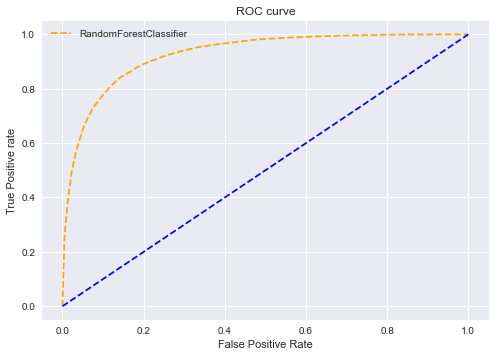

In [114]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# 8.Saving the model

In [118]:
import joblib
joblib.dump(fianlRFC,"Micro_Credit_Defaulter_Final.pkl")

['Micro_Credit_Defaulter_Final.pkl']